### Работу выполнила студентка группы 3822М1ПМкн1 Журилова Анастасия

In [3]:
# Массивы (матрицы, векторы, линейная алгебра)
import numpy as np

# Научная графика
import matplotlib.pyplot as plt

# Таблицы и временные ряды (dataframe, series)
import pandas as pd

# Еще больше красивой графики для визуализации данных
import seaborn as sns

# Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
%matplotlib inline

### 0. Описание задачи (постановка задачи)

 На протяжении некоторого времени глобальная финансовая компания собирала основные банковские реквизиты своих клиентов. Накопив некоторое количество информации, компания смогла составить кредитные истории каждого клиента. Руководство компании хочет создать интеллектуальную систему для разделения людей по группам кредитных баллов, чтобы сократить ручные усилия сотрудников.

 Необходимо произвести обработку данных в этой глобальной финансовой компании.

Т.е. цель классификации состоит в том, чтобы определить, к какому классу клинетов (признак: Credit_Score) относится тот или иной клиент компании (Poor, Standard, Good). Набор данных содержит обучающие и тестовые данные.

### 1. Чтение данные

Выведем таблицу с данными и проанализируем имеющиеся признаки.

In [4]:
credit_data = pd.read_csv('./data/train.csv')

C:\Temp\ipykernel_10772\1574723364.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  credit_data = pd.read_csv('./data/train.csv')


Посмотрим размер таблицы:

In [5]:
credit_data.shape

(100000, 28)

Количество строк (каждая строка соответствует одному клиненту) 100 000, и количество столбцов (каждый столбец соответствует конкретному признаку) 28.

Таблица содержит данные о 100 тысяч клиентов компании. У каждого клиента есть ряд признаков: имя, возраст, id, вид занятости, годовой доход и т.д.

Посмотрим теперь на таблицу (для наглядности представлия данных).

In [6]:
credit_data

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12                    NaN                  3  ...   
2      Scientist      19114.12                    NaN                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4      Scientist      19114.12            1824.843333                  3  ...   
...          ...           ...                    ...                ...  ...   
99995   Mechanic      39628.99            3359.415833                  4  ...   
99996   Mechanic      39628.99            3359.415833                  4  ...   
99997   Mechanic      39628.99            3359.415833                  4  ...   
99998   Mechanic      39628.99            3359.415833                  4  ...   
99999   Mechanic     39628.99_            3359.415833                  4  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0               _            809.98                26.822620   
1            Good            809.98                31.944960   
2            Good            809.98                28.609352   
3            Good            809.98                31.377862   
4            Good            809.98                24.797347   
...           ...               ...                      ...   
99995           _            502.38                34.663572   
99996           _            502.38                40.565631   
99997        Good            502.38                41.255522   
99998        Good            502.38                33.638208   
99999        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ...                               ...   

Таким образом, объем данных N = 100 000, признаков d = 28, классов K = 3 (признак: Credit_Score).

Теперь рассморим все колонки = признаки.

In [7]:
credit_data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Всего имеется 28 признаков:
* **ID** - идентификатор записи в данных (например, с каждого клиента собраны данные за несколько месяцев, каждый месяц - новая запись, следовательно, новый номер);
* **Customer_ID** - идентификатор самого клиента в базе данных;
* **Month** - месяц записи о клиенте;
* **Name** - имя клиента;
* **Age** - возраст клиента;
* **SSN** - номер социального страхования человека (уникальный девятизначный номер, присваиваемый гражданам и резидтам США);
* **Occupation** - вид занятости (работа, должность, специальность);
* **Annual_Income** - годовой доход человека;
* **Monthly_Inhand_Salary** - заработная плата клиента в месяц;
* **Num_Bank_Accounts** - количество банковских счетов, которыми владеет клиент;
* **Num_Credit_Card** - количество других кредитных карт у клиента (т.е. есть у клиента еще кредитки, кроме той, по которой собирается информация здесь);
* **Interest_Rate** - процентная ставка по кредитной карте;
* **Num_of_Loan** - количество кредитов, взятых в банке клиентом;
* **Type_of_Loan** - виды займов, взятых клиентом в банке (например, у клиента: Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan);
* **Delay_from_due_date** - среднее количество дней задержки с даты платежа;
* **Num_of_Delayed_Payment** - среднее количество платежей, задержанных клиентом;
* **Changed_Credit_Limit** -  процентное изминение лимита кредитной карты;
* **Num_Credit_Inquiries** - количество запросов по кредитной карте клиентом;
* **Credit_Mix** - классификация сочетания кредитов (Standard, Good, Bad);
* **Outstanding_Debt** - оставшийся долг, подлежащий выплате (в долларах США);
* **Credit_Utilization_Ratio** - коэффициент использования кредитной карты;
* **Credit_History_Age** - возраст кредитной истории лица (сколько лет используется кредитный счёт);
* **Payment_of_Min_Amount** - была ли выплача лицом только минимальная сумма (Yes, No, NM);
* **Total_EMI_per_month** - ежемесячные платежи EMI (в долларах США, электронные дьги, которые хранятся в электронном виде на электронном носителе);
* **Amount_invested_monthly** - ежемесячая сумма, инвестированная клиентом (в долларах США);
* **Payment_Behaviour** - платежное поведие клиента (в долларах США, например, High_spent_Small_value_payments);
* **Monthly_Balance** - ежемесячная сумма баланса клиента (в долларах США);
* **Credit_Score** - кредитный рейтинг (Poor, Standard, Good).

Выведем тип данных всех столбцов, представлных в таблице:

In [8]:
credit_data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

Видим, что 20 признаков имеют тип данных "Object", это признаки которые требуют предобработки. 


Признаки ID, Customer_ID являются типом Object, однако, гораздо удобнее перевести эти признаки в числовые. 
При переводе можно реализовать перевод номеров из шестнадцатиричной системы в десятичную (что и сделаем):

In [9]:
#переводим id из шестнадцатиричного вида в десятичный
credit_data['ID'] = credit_data.ID.apply(lambda x: int(x, 16))
credit_data['Customer_ID'] = credit_data.Customer_ID.apply(lambda x: int(x[4:], 16))

Рассмотрим полученный результат:

In [10]:
credit_data["ID"], credit_data["Customer_ID"]

(0          5634
 1          5635
 2          5636
 3          5637
 4          5638
           ...  
 99995    155625
 99996    155626
 99997    155627
 99998    155628
 99999    155629
 Name: ID, Length: 100000, dtype: int64,
 0         3392
 1         3392
 2         3392
 3         3392
 4         3392
          ...  
 99995    37932
 99996    37932
 99997    37932
 99998    37932
 99999    37932
 Name: Customer_ID, Length: 100000, dtype: int64)

Теперь рассмотрим признаки **Name**, **Month**. Переведем их в специальный тип, предназначный для хранения категориальных признаков:

In [11]:
credit_data["Month"] = credit_data["Month"].astype("category")
credit_data["Name"] = credit_data["Name"].astype("category")

Рассмотрим полученный результат:

In [12]:
credit_data["Month"], credit_data["Name"]

(0         January
 1        February
 2           March
 3           April
 4             May
            ...   
 99995       April
 99996         May
 99997        June
 99998        July
 99999      August
 Name: Month, Length: 100000, dtype: category
 Categories (8, object): ['April', 'August', 'February', 'January', 'July', 'June', 'March', 'May'],
 0        Aaron Maashoh
 1        Aaron Maashoh
 2        Aaron Maashoh
 3        Aaron Maashoh
 4        Aaron Maashoh
              ...      
 99995            Nicks
 99996            Nicks
 99997            Nicks
 99998            Nicks
 99999            Nicks
 Name: Name, Length: 100000, dtype: category
 Categories (10139, object): [' Mattr', ' Mattx', ' Stevei', ' Stevep', ..., 'ty', 'yi', 'yk', 'yv'])

Особое внимание следует уделить признаку **Age**, так как он обладает рядом проблем:
* некоторые значения заканчиваются на нижнее подчеркивание (наприме, 28_);
* необходимо проверить признак на допустимые пределы (т.е. от 1 до 100, можно ужесточить рамки, но для простоты оставим такой промежуток);


Исправляем нижнее подчеркивание:

In [13]:
# исправляем нижнее подчеркивание
def AgeUnderscore(row):
    lenStr = len(row.Age)
    if((issubclass(type(row.Age), str)) and (row.Age[lenStr-1] == '_')):
        age = int(row.Age[:lenStr-1])
        return age
    else:
        age = int(row.Age[:lenStr])
        return age
        
credit_data['Age'] = credit_data.apply(AgeUnderscore,axis=1)
credit_data['Age']

0         23
1         23
2       -500
3         23
4         23
        ... 
99995     25
99996     25
99997     25
99998     25
99999     25
Name: Age, Length: 100000, dtype: int64

Исправляем выход за пределы допустимого возраста.

In [14]:
#исправляем выход за пределы допустимого возраста
def AgeLimit(row):
    if((row.Age >100) or (row.Age < 0)):
        return None
    else:
        return row.Age

credit_data['Age'] = credit_data.apply(AgeLimit,axis=1)
credit_data['Age']

0        23.0
1        23.0
2         NaN
3        23.0
4        23.0
         ... 
99995    25.0
99996    25.0
99997    25.0
99998    25.0
99999    25.0
Name: Age, Length: 100000, dtype: float64

Т.к. мы заменили значения, выходящие за границы допустимого на Nan, пришлось признак **Age** перевести не в int, а в float.

В значения признака **SNN** встречаются недопустимые значения, исключим их и переведем признак в категориальный тип:

In [15]:
# исключим #F%$D@*&8 значения
def SSN(row):
    if(row.SSN == '#F%$D@*&8'):
        return None
    else:
        return row.SSN

credit_data['SSN']=credit_data.apply(SSN,axis=1)
credit_data["SSN"] = credit_data["SSN"].astype("category")
credit_data["SSN"]

0        821-00-0265
1        821-00-0265
2        821-00-0265
3        821-00-0265
4        821-00-0265
            ...     
99995    078-73-5990
99996    078-73-5990
99997    078-73-5990
99998    078-73-5990
99999    078-73-5990
Name: SSN, Length: 100000, dtype: category
Categories (12500, object): ['000-08-1349', '000-40-3312', '000-58-0568', '000-60-0688', ..., '999-84-9578', '999-92-7186', '999-95-7259', '999-99-3421']

У признака **Ocupation** встречаются недопустимые значения, исключим их и переведем признак в категориальный тип:

In [16]:
#исключим ____________ значия
def Oc(row):
    if(row.Occupation == '_______'):
        return None
    else:
        return row.Occupation

credit_data["Occupation"]=credit_data.apply(Oc,axis=1)
credit_data["Occupation"] = credit_data["Occupation"].astype("category")
credit_data["Occupation"]

0        Scientist
1        Scientist
2        Scientist
3        Scientist
4        Scientist
           ...    
99995     Mechanic
99996     Mechanic
99997     Mechanic
99998     Mechanic
99999     Mechanic
Name: Occupation, Length: 100000, dtype: category
Categories (15, object): ['Accountant', 'Architect', 'Developer', 'Doctor', ..., 'Musician', 'Scientist', 'Teacher', 'Writer']

Нижнее подчеркивание так же имеют данные признака **Annual_Income**, поэтому с ним повторяем действия, схожие с признаком **Age**:

In [18]:
#исключаем _
def AnnualIncomeUnderscore(row):
    x = len(row.Annual_Income)
    if((issubclass(type(row.Annual_Income), str)) and (row.Annual_Income[x-1] == '_')):
        ai = row.Annual_Income[:x-1]
        return ai
    elif(issubclass(type(row.Annual_Income), str)):
        ai = row.Annual_Income[:x]
        return ai
    else:
        ai = row.Annual_Income
        return ai

credit_data["Annual_Income"] = credit_data.apply(AnnualIncomeUnderscore,axis=1)
credit_data["Annual_Income"] = credit_data["Annual_Income"].astype(float)
credit_data["Annual_Income"]

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        19114.12
           ...   
99995    39628.99
99996    39628.99
99997    39628.99
99998    39628.99
99999    39628.99
Name: Annual_Income, Length: 100000, dtype: float64

Признак **Monthly_Inhand_Salary** предобработки не требует.

In [19]:
credit_data["Monthly_Inhand_Salary"]

0        1824.843333
1                NaN
2                NaN
3                NaN
4        1824.843333
            ...     
99995    3359.415833
99996    3359.415833
99997    3359.415833
99998    3359.415833
99999    3359.415833
Name: Monthly_Inhand_Salary, Length: 100000, dtype: float64

Признаки **Num_Bank_Accounts**, **Num_Credit_Card**, **Interest_Rate** требуют проверку на допустимые значения (т.е. значения должны быть больше 0).
Тоже самое и для призкака **Num_of_Loan**, однако его сначала нужно перевести в числовой тип.

In [20]:
#Num_Bank_Accounts, у клиента может быть 0 счетов или неограниченно много (официального ограничения нет),
# но невозможны отрицательные значения
def NBA(row):
    if(row.Num_Bank_Accounts < 0 ):
        return None
    else:
        return row.Num_Bank_Accounts

credit_data["Num_Bank_Accounts"]=credit_data.apply(NBA,axis=1)
credit_data["Num_Bank_Accounts"]

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
99995    4.0
99996    4.0
99997    4.0
99998    4.0
99999    4.0
Name: Num_Bank_Accounts, Length: 100000, dtype: float64

C **Num_Credit_Card** поступаем аналогично:

In [21]:
#Num_Credit_Card, у клиента может быть 0 кредитных карт или неограниченно много (официального ограничения нет),
# но невозможны отрицательные значения
def NCC(row):
    if(row.Num_Credit_Card < 0 ):
        return None
    else:
        return row.Num_Credit_Card

credit_data["Num_Credit_Card"]=credit_data.apply(NCC,axis=1)
credit_data["Num_Credit_Card"]

0        4
1        4
2        4
3        4
4        4
        ..
99995    6
99996    6
99997    6
99998    6
99999    6
Name: Num_Credit_Card, Length: 100000, dtype: int64

Теперь проведем обработку признака **Interest_Rate**: т.к. этот признак отвечает за процентную ставку по кредитной карте, то примем, что значения могут находится в диапазоне от 0 до 100%.

In [22]:
#Interest_Rate, проверим на невозможные значения
def IR(row):
    if((row.Interest_Rate < 0) or (row.Interest_Rate > 100 )):
        return None
    else:
        return row.Interest_Rate

credit_data["Interest_Rate"]=credit_data.apply(IR,axis=1)
credit_data["Interest_Rate"]

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
99995    7.0
99996    7.0
99997    NaN
99998    7.0
99999    7.0
Name: Interest_Rate, Length: 100000, dtype: float64

Теперь займемся **Num_of_Loan**: он содержит в себе те же проблемы, что и признак **Age**, следовательно, его нужно обрабатывать похожим образом.

In [23]:
#обработка _
def NOLUnderscore(row):
    x = len(row.Num_of_Loan)
    if((issubclass(type(row.Num_of_Loan), str)) and (row.Num_of_Loan[x-1] == '_')):
        nol = int(row.Num_of_Loan[:x-1])
        return nol
    else:
        nol = int(row.Num_of_Loan[:x])
        return nol

#проверка на допустимые значия
def NOL(row):
    if(row.Num_of_Loan < 0 ):
        return None
    else:
        return row.Num_of_Loan

credit_data['Num_of_Loan'] = credit_data.apply(NOLUnderscore,axis=1)
credit_data["Num_of_Loan"]=credit_data.apply(NOL,axis=1)
credit_data["Num_of_Loan"]

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
99995    2.0
99996    2.0
99997    2.0
99998    2.0
99999    2.0
Name: Num_of_Loan, Length: 100000, dtype: float64

Признак **Type_Of_Loan** переводим в категориальный:

In [24]:
credit_data['Type_of_Loan'].replace([np.NaN], None, inplace=True)
credit_data["Type_of_Loan"]=credit_data["Type_of_Loan"].astype("category")
credit_data["Type_of_Loan"]

0        Auto Loan, Credit-Builder Loan, Personal Loan,...
1        Auto Loan, Credit-Builder Loan, Personal Loan,...
2        Auto Loan, Credit-Builder Loan, Personal Loan,...
3        Auto Loan, Credit-Builder Loan, Personal Loan,...
4        Auto Loan, Credit-Builder Loan, Personal Loan,...
                               ...                        
99995                          Auto Loan, and Student Loan
99996                          Auto Loan, and Student Loan
99997                          Auto Loan, and Student Loan
99998                          Auto Loan, and Student Loan
99999                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 100000, dtype: category
Categories (6260, object): ['Auto Loan', 'Auto Loan, Auto Loan, Auto Loan, Auto Loan, C..., 'Auto Loan, Auto Loan, Auto Loan, Auto Loan, S..., 'Auto Loan, Auto Loan, Auto Loan, Credit-Build..., ..., 'Student Loan, and Not Specified', 'Student Loan, and Payday Loan', 'Student Loan, and Personal Loan

Признак **Delay_from_due_date** уже в нужном типе, но нужно проверить его на допустимые значения:

In [25]:
#Delay_from_due_date, невозможны отрицательные значия
def DFDD(row):
    if(row.Delay_from_due_date < 0 ):
        return None
    else:
        return row.Delay_from_due_date

credit_data["Delay_from_due_date"]=credit_data.apply(DFDD,axis=1)
credit_data["Delay_from_due_date"]

0         3.0
1         NaN
2         3.0
3         5.0
4         6.0
         ... 
99995    23.0
99996    18.0
99997    27.0
99998    20.0
99999    18.0
Name: Delay_from_due_date, Length: 100000, dtype: float64

Признаки **Num_of_Delayed_Payment**, **Changed_Credit_Limit**  необходимо перевести из типа object  в типы числовые, проверив на недопустимые значения.

Пусть отрицательные значения в **Num_of_Delayed_Payment** означают, что клиент уплатил вперед (т.е. нет задолжности):

In [26]:
#обработка _
from cmath import nan
def NODPUnderscore(row):    
    if (issubclass(type(row.Num_of_Delayed_Payment), str)):
        x = len(row.Num_of_Delayed_Payment)
        if (row.Num_of_Delayed_Payment[x-1] == '_'):
            nodp = int(row.Num_of_Delayed_Payment[:x-1])
            return nodp
        else:
            nodp = int(row.Num_of_Delayed_Payment[:x])
            return nodp
    else:
        return row.Num_of_Delayed_Payment    

credit_data["Num_of_Delayed_Payment"]=credit_data.apply(NODPUnderscore,axis=1)
credit_data["Num_of_Delayed_Payment"]

0        7.0
1        NaN
2        7.0
3        4.0
4        NaN
        ... 
99995    7.0
99996    7.0
99997    6.0
99998    NaN
99999    6.0
Name: Num_of_Delayed_Payment, Length: 100000, dtype: float64

В признаке **Changed_Credit_Limit** необходимо обработать значение "_".

In [27]:
#обработка _
def CLUnderscore(row):
    if(row.Changed_Credit_Limit == '_'):
        return None
    else:
        return row.Changed_Credit_Limit

credit_data["Changed_Credit_Limit"]=credit_data.apply(CLUnderscore,axis=1)
credit_data["Changed_Credit_Limit"]=credit_data["Changed_Credit_Limit"].astype(float)
credit_data["Changed_Credit_Limit"]

0        11.27
1        11.27
2          NaN
3         6.27
4        11.27
         ...  
99995    11.50
99996    11.50
99997    11.50
99998    11.50
99999    11.50
Name: Changed_Credit_Limit, Length: 100000, dtype: float64

Признак **Num_Credit_Inquiries** не нуждается в преобразованиях.

In [28]:
credit_data["Num_Credit_Inquiries"]

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
99995    3.0
99996    3.0
99997    3.0
99998    3.0
99999    3.0
Name: Num_Credit_Inquiries, Length: 100000, dtype: float64

Признак **Credit_Mix** необходимо перевести в  категориальный. Признак **Outstanding_Debt** в числовой.

В значениях **Credit_Mix** есть '_', избавимся от них.

In [29]:
#обработка _
def CMUnderscore(row):
    if(row.Credit_Mix == '_'):
        return None
    else:
        return row.Credit_Mix

credit_data["Credit_Mix"] = credit_data.apply(CMUnderscore,axis=1)   
credit_data["Credit_Mix"] = credit_data["Credit_Mix"].astype("category")
credit_data["Credit_Mix"] 

0         NaN
1        Good
2        Good
3        Good
4        Good
         ... 
99995     NaN
99996     NaN
99997    Good
99998    Good
99999    Good
Name: Credit_Mix, Length: 100000, dtype: category
Categories (3, object): ['Bad', 'Good', 'Standard']

У признака **Outstanding_Debt** некоторые значения заканчиваются на нижнее подчеркивание, исключим эти ситуации.

In [30]:
#обработка _
def ODUnderscore(row):
    if(type(row.Outstanding_Debt) == str):
        x = len(row.Outstanding_Debt)
        if(row.Outstanding_Debt[x-1] == '_'):
            odebt = row.Outstanding_Debt[:x-1]
            return odebt
        else:
            odebt = row.Outstanding_Debt[:x]
            return odebt
    else:
        return row.Outstanding_Debt

credit_data["Outstanding_Debt"] = credit_data.apply(ODUnderscore,axis=1)
credit_data["Outstanding_Debt"] = credit_data["Outstanding_Debt"].astype(float)
credit_data["Outstanding_Debt"]

0        809.98
1        809.98
2        809.98
3        809.98
4        809.98
          ...  
99995    502.38
99996    502.38
99997    502.38
99998    502.38
99999    502.38
Name: Outstanding_Debt, Length: 100000, dtype: float64

Признак **Credit_Utilization_Ratio** предобработки не требует.

In [31]:
credit_data["Credit_Utilization_Ratio"]

0        26.822620
1        31.944960
2        28.609352
3        31.377862
4        24.797347
           ...    
99995    34.663572
99996    40.565631
99997    41.255522
99998    33.638208
99999    34.192463
Name: Credit_Utilization_Ratio, Length: 100000, dtype: float64

Признак **Credit_History_Age** удобнее всего перевести в числовой. В данном случае признак будет говорить о количесве месяцев использования кредитной карты.

In [32]:
#Перевод строкового типа в числовой (кол-во месяцев)
def Month_Converter(x):
    if(type(x.Credit_History_Age) != float):
        if (x.Credit_History_Age != None):
            z = x.Credit_History_Age.split(' ')
            num1 = int(z[0])
            num2 = int(z[3])
            return (num1*12)+num2
        else:
            return x.Credit_History_Age
    else:
        return x.Credit_History_Age
        
credit_data["Credit_History_Age"] = credit_data.apply(Month_Converter,axis=1)
credit_data["Credit_History_Age"]

0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

Признак **Payment_of_Min_Amount** переводим в бинарный тип, исключив значение "NM".

In [33]:
#Превратим Payment_of_Min_Amount в 1, если "Yes", в 0 если "No"
if type(credit_data["Payment_of_Min_Amount"].iloc[0]) == str:
    credit_data["Payment_of_Min_Amount"] = credit_data["Payment_of_Min_Amount"].apply(lambda x: 1 if x == "Yes" else (0 if x == "No" else None))

credit_data["Payment_of_Min_Amount"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99995    0.0
99996    0.0
99997    0.0
99998    0.0
99999    0.0
Name: Payment_of_Min_Amount, Length: 100000, dtype: float64

Признак **Total_EMI_per_month** не требует предобработки.

In [34]:
credit_data["Total_EMI_per_month"]

0        49.574949
1        49.574949
2        49.574949
3        49.574949
4        49.574949
           ...    
99995    35.104023
99996    35.104023
99997    35.104023
99998    35.104023
99999    35.104023
Name: Total_EMI_per_month, Length: 100000, dtype: float64

Признак **Amount_invested_monthly** имеет недопустимые значения, исключим их.

In [35]:
# исключим неверные значения
def AIM(row):
    if(row.Amount_invested_monthly == '__10000__'):
        return None
    else:
        return row.Amount_invested_monthly

credit_data["Amount_invested_monthly"] = credit_data.apply(AIM,axis=1)
credit_data["Amount_invested_monthly"] = credit_data["Amount_invested_monthly"].astype(float)
credit_data["Amount_invested_monthly"]

0         80.415295
1        118.280222
2         81.699521
3        199.458074
4         41.420153
            ...    
99995     60.971333
99996     54.185950
99997     24.028477
99998    251.672582
99999    167.163865
Name: Amount_invested_monthly, Length: 100000, dtype: float64

Признак **Payment_Behaviour** имеет недопустимые значения, исключим их.

In [36]:
# исключим неверные значения
def PB(row):
    if(row.Payment_Behaviour == '!@9#%8'):
        return None
    else:
        return row.Payment_Behaviour

credit_data["Payment_Behaviour"] = credit_data.apply(PB,axis=1)
credit_data["Payment_Behaviour"] = credit_data["Payment_Behaviour"].astype("category")
credit_data["Payment_Behaviour"]

0         High_spent_Small_value_payments
1          Low_spent_Large_value_payments
2         Low_spent_Medium_value_payments
3          Low_spent_Small_value_payments
4        High_spent_Medium_value_payments
                       ...               
99995     High_spent_Large_value_payments
99996    High_spent_Medium_value_payments
99997     High_spent_Large_value_payments
99998      Low_spent_Large_value_payments
99999                                 NaN
Name: Payment_Behaviour, Length: 100000, dtype: category
Categories (6, object): ['High_spent_Large_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments']

Признак **Monthly_Balance** имеет недопустимые значения, исключим их. Так же переведем тип в числовой.

In [37]:
# исключим неверные значения
def MB(row):
    if(row.Monthly_Balance == '__-333333333333333333333333333__'):
        return None
    else:
        return row.Monthly_Balance

credit_data["Monthly_Balance"] = credit_data.apply(MB,axis=1)
credit_data["Monthly_Balance"] = credit_data["Monthly_Balance"].astype(float)
credit_data["Monthly_Balance"]

0        312.494089
1        284.629162
2        331.209863
3        223.451310
4        341.489231
            ...    
99995    479.866228
99996    496.651610
99997    516.809083
99998    319.164979
99999    393.673696
Name: Monthly_Balance, Length: 100000, dtype: float64

Последний признак, который мы и будем предсказывать **Credit_Score**, необходимо первести в категориальный тип.

In [38]:
def creditscore(row):
    if(row.Credit_Score == 'Poor'):
        return 0
    elif(row.Credit_Score == 'Standard'):
        return 1
    else:
        return 2

credit_data.Credit_Score = credit_data.apply(creditscore,axis=1)
credit_data["Credit_Score"]

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

In [39]:
credit_data.Credit_Score.value_counts()

1    53174
0    28998
2    17828
Name: Credit_Score, dtype: int64

Обработка признаков (чтение данных) завершено. Таким образом, мы получили следующие типы данных:

In [40]:
credit_data.dtypes

ID                             int64
Customer_ID                    int64
Month                       category
Name                        category
Age                          float64
SSN                         category
Occupation                  category
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts            float64
Num_Credit_Card                int64
Interest_Rate                float64
Num_of_Loan                  float64
Type_of_Loan                category
Delay_from_due_date          float64
Num_of_Delayed_Payment       float64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                  category
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Credit_History_Age           float64
Payment_of_Min_Amount        float64
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour           category
Monthly_Balance              float64
C

### 2. Визуализация данных и вычисление основных характеристик

Визуализация данных - это процесс преобразования больших наборов данных в статистическое и графическое представление. 

Следовательно, для начального анализа удобно этим заняться, сначала представить большой набор данных в упрощенном виде.


Получим визуализацию наших данных, а так же сводную информацию о количественных признаках.
Найдем средние значения, стандартное отклонение, минимальное и макимальное значения, медиану и значения квартилей, построим матрицу корреляции:

Получим сводку числовых значений в наборе данных. А именно: медиану, стандартное отклонение, минимальное значение, максимальное значение, 1-й квартиль, 2-й квартиль, 3-й квартиль столбцов с числовыми значениями. Он также подсчитывает количество переменных в наборе данных. 

Так же, мы сможем увидеть, есть ли пропущенные значения в столбцах.

In [41]:
credit_data.describe()

ID    Customer_ID           Age  Annual_Income  \
count  100000.000000  100000.000000  97224.000000   1.000000e+05   
mean    80631.500000   25982.666640     33.323274   1.764157e+05   
std     43301.486619   14340.543051     10.778909   1.429618e+06   
min      5634.000000    1006.000000     14.000000   7.005930e+03   
25%     43132.750000   13664.500000     24.000000   1.945750e+04   
50%     80631.500000   25777.000000     33.000000   3.757861e+04   
75%    118130.250000   38385.000000     42.000000   7.279092e+04   
max    155629.000000   50999.000000    100.000000   2.419806e+07   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000       99979.000000     100000.00000   
mean             4194.170850          17.095080         22.47443   
std              3183.686167         117.416871        129.05741   
min               303.645417           0.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate   Num_of_Loan  Delay_from_due_date  ...  \
count   97988.000000  96124.000000         99409.000000  ...   
mean       14.546679      7.163622            21.207245  ...   
std         8.798523     60.314923            14.794693  ...   
min         1.000000      0.000000             0.000000  ...   
25%         7.000000      2.000000            10.000000  ...   
50%        13.000000      3.000000            18.000000  ...   
75%        20.000000      5.000000            28.000000  ...   
max       100.000000   1496.000000            67.000000  ...   

       Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  \
count          97909.000000          98035.000000     100000.000000   
mean              10.389025             27.754251       1426.220376   
std                6.789496            193.177339       1155.129026   
min               -6.490000              0.000000          0.230000   
25%                5.320000              3.000000        566.072500   
50%                9.400000              6.000000       1166.155000   
75%               14.870000              9.000000       1945.962500   
max               36.970000           2597.000000       4998.070000   

       Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
count             100000.000000        90970.000000           87993.000000   
mean                  32.285173          221.195405               0.594661   
std                    5.116875           99.741364               0.490960   
min                   20.000000            1.000000               0.000000   
25%                   28.052567          144.000000               0.000000   
50%                   32.305784          219.000000               1.000000   
75%                   36.496663          302.000000               1.000000   
max                   50.000000          404.000000               1.000000   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  \
count        100000.000000             91216.000000     98791.000000   
mean           1403.118217               195.539456       402.551258   
std            8306.041270               199.564527       213.925499   
min               0.000000                 0.000000         0.007760   
25%              30.306660                72.236692       270.106630   
50%              69.249473               128.954538       336.731225   
75%             161.224249               236.815814       470.262938   
max           82331.000000              1977.326102      1602.040519   

       Credit_Score  
count  100000.00000  
mean        0.88830  
std         0.67512  
min         0.00000  
25%         0.00000  
50%         1.00000  
75%         1.00000  
max         2.00000  

[8 rows x 21 columns]

В таблице выше представлены только числовые признаки, посмотрим на категориальные:

In [42]:
credit_data.describe(include=['category'])

Month    Name          SSN Occupation   Type_of_Loan Credit_Mix  \
count   100000   90015        94428      92938          88592      79805   
unique       8   10139        12500         15           6260          3   
top      April  Langep  000-08-1349     Lawyer  Not Specified   Standard   
freq     12500      44            8       6575           1408      36479   

                     Payment_Behaviour  
count                            92400  
unique                               6  
top     Low_spent_Small_value_payments  
freq                             25513

При рассмотрении данных таблиц, можно обратить внимание, что присутствует достаточное количество пропущенных значений (их обработка будет произведена в пункте 3).

Учитывая данные таблицы, можно сделать несколько выводов: средний возраст клиентов банка 30-40 лет, что логично; в качестве клиентов банка представлены люди с разным уровнем дохода (от 7 000$ до 24 000 000$ в год), соответсвенно месячная зарплата имеет такой же разброс; большинсвто людей имеет 7 кредитных карт и 5 кредитов; к сожалению, количество людей, задолжавших платёж, составляет большиство; долг в $, как правило не превышает нескольких тысяч; коэффициент использования кредитной карты не превышает 50%; 75% пользователей являются обладателями кредтной карты на протяжении 25 лет; месячный баланс, инвестирование и трата электронных денег так же подчеркивают наличие клиентов разного уровня дохода; большинство пользователей оносятся в рейтингу "Standart".

Стоит обратить внимание на столбцы: **Num_Bank_Accounts**, **Num_Credit_Card**, **Num_of_Loan**, **Num_of_Delayed_Payment**, **Num_Credit_Inquiries** данные столбцы стоит проверить на выбросы. Так как максимальные и минимальные значения не вписываются в прикладную область задачи (например, 1798 разных аккаунтов в банках).	

#### 2.5 Проверка наличия выбросов и борьба с ними

Проверим **Num_Bank_Accounts**, **Num_Credit_Card**, **Num_of_Loan**, **Num_of_Delayed_Payment**, **Num_Credit_Inquiries** данные столбцы на наличие выбросов.

Возможно, это ошибки в данных. В любом случае выбросы, как правило, мешают построить хорошее решающее правило и их рекомендуется выбрасывать.

Для обнаружения выбросов найдем, например, квартили для признаков

Признак **Num_Bank_Accounts**:

In [43]:
credit_data["Num_Bank_Accounts"].quantile([.01,.05,.1,.5, .8, .9,.95, .985, .99,.995])

0.010       0.00
0.050       1.00
0.100       2.00
0.500       6.00
0.800       8.00
0.900       9.00
0.950      10.00
0.985      10.00
0.990     445.22
0.995    1096.00
Name: Num_Bank_Accounts, dtype: float64

Можно наблюдать, что **95%** пользователей имеют от **0** до **10** аккаунтов в банках (это значения квартилей, соответствующих уровням **0,01** и **0,985** соответственно).

Признак **Num_Credit_Card**:

In [44]:
credit_data["Num_Credit_Card"].quantile([.005,.01,.05,.1,.5, .8, .9,.95, .97, .99,.995])

0.005       1.0
0.010       1.0
0.050       3.0
0.100       3.0
0.500       5.0
0.800       7.0
0.900       9.0
0.950      10.0
0.970      10.0
0.990     849.0
0.995    1177.0
Name: Num_Credit_Card, dtype: float64

Можно наблюдать, что **95%** пользователей имеют от **1** до **10** кредиток в банках (это значения квартилей, соответствующих уровням **0,005** и **0,97** соответственно).

Признак **Num_of_Loan**:

In [45]:
credit_data["Num_of_Loan"].quantile([.005,.01,.05,.1,.5, .8, .9,.95,.99,.995, .9995])

0.0050       0.0
0.0100       0.0
0.0500       0.0
0.1000       0.0
0.5000       3.0
0.8000       6.0
0.9000       7.0
0.9500       8.0
0.9900       9.0
0.9950       9.0
0.9995    1353.0
Name: Num_of_Loan, dtype: float64

Можно наблюдать, что **99,95%** пользователей имеют от **0** до **9** кредитов в банках (это значения квартилей, соответствующих уровням **0,005** и **0,995** соответственно).

Признак **Num_of_Delayed_Payment**:

In [46]:
credit_data["Num_of_Delayed_Payment"].quantile([.005,.01,.05,.1,.5, .8, .9,.95,.99,.995, .9995])

0.0050      -1.000
0.0100       0.000
0.0500       2.000
0.1000       4.000
0.5000      14.000
0.8000      19.000
0.9000      21.000
0.9500      24.000
0.9900      27.000
0.9950    1732.045
0.9995    4131.009
Name: Num_of_Delayed_Payment, dtype: float64

Можно наблюдать, что **99%** пользователей задержали от **0** до **27** платежей (это значения квартилей, соответствующих уровням **0,01** и **0,99** соответственно). А **0,5%** даже уплатили вперед один платёж.

Признак **Num_Credit_Inquiries**:

In [47]:
credit_data["Num_Credit_Inquiries"].quantile([.005,.01,.05,.1,.5, .8, .9,.95, .98, .985, .99,.995, .9995])

0.0050       0.000
0.0100       0.000
0.0500       0.000
0.1000       1.000
0.5000       6.000
0.8000      10.000
0.9000      12.000
0.9500      13.000
0.9800      16.000
0.9850     298.490
0.9900    1109.280
0.9950    1820.000
0.9995    2514.983
Name: Num_Credit_Inquiries, dtype: float64

Можно наблюдать, что **99%** пользователей совершили от **0** до **16** запросов по кредитной карте(это значения квартилей, соответствующих уровням **0,005** и **0,98** соответственно). 

Удалим все строки таблицы, в которых данные признаки выходят за пределы квантилей, между которыми не обнаружены выбросы.

In [48]:
credit_data_rows_to_drop = credit_data[
    (credit_data["Num_Bank_Accounts"] < credit_data["Num_Bank_Accounts"].quantile(0.005)) | (credit_data["Num_Bank_Accounts"] > credit_data["Num_Bank_Accounts"].quantile(0.985)) |
    (credit_data["Num_Credit_Card"] < credit_data["Num_Credit_Card"].quantile(0.005)) | (credit_data["Num_Credit_Card"] > credit_data["Num_Credit_Card"].quantile(0.97)) |
    (credit_data["Num_of_Loan"] < credit_data["Num_of_Loan"].quantile(0.005)) | (credit_data["Num_of_Loan"] > credit_data["Num_of_Loan"].quantile(0.995)) |
    (credit_data["Num_of_Delayed_Payment"] < credit_data["Num_of_Delayed_Payment"].quantile(0.01)) | (credit_data["Num_of_Delayed_Payment"] > credit_data["Num_of_Delayed_Payment"].quantile(0.99)) |
    (credit_data["Num_Credit_Inquiries"] < credit_data["Num_Credit_Inquiries"].quantile(0.005)) | (credit_data["Num_Credit_Inquiries"] > credit_data["Num_Credit_Inquiries"].quantile(0.98))].index

clean_credit_data = credit_data.drop(credit_data_rows_to_drop)
clean_credit_data.shape

(92653, 28)

Таким образом осталось из 100 тысяч, 92 653 объекта (т.е. клиентов банка).

Помотрим теперь снова на основные характеристики:

In [49]:
clean_credit_data.describe()

ID   Customer_ID           Age  Annual_Income  \
count   92653.000000  92653.000000  90076.000000   9.265300e+04   
mean    80616.278782  25981.250947     33.308173   1.766188e+05   
std     43297.801732  14338.656852     10.779575   1.431610e+06   
min      5634.000000   1006.000000     14.000000   7.005930e+03   
25%     43091.000000  13654.000000     24.000000   1.945305e+04   
50%     80604.000000  25800.000000     33.000000   3.757861e+04   
75%    118116.000000  38388.000000     42.000000   7.279092e+04   
max    155629.000000  50999.000000     99.000000   2.419806e+07   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           78726.000000       92633.000000     92653.000000   
mean             4193.089719           5.378882         5.532017   
std              3179.548862           2.585947         2.059262   
min               303.645417           0.000000         1.000000   
25%              1625.188333           3.000000         4.000000   
50%              3093.153333           6.000000         5.000000   
75%              5961.637500           7.000000         7.000000   
max             15204.633333          10.000000        10.000000   

       Interest_Rate   Num_of_Loan  Delay_from_due_date  ...  \
count   90763.000000  89035.000000         92116.000000  ...   
mean       14.558025      3.535261            21.219310  ...   
std         8.789909      2.444868            14.770317  ...   
min         1.000000      0.000000             0.000000  ...   
25%         7.000000      2.000000            10.000000  ...   
50%        13.000000      3.000000            18.000000  ...   
75%        20.000000      5.000000            28.000000  ...   
max       100.000000      9.000000            67.000000  ...   

       Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  \
count          90713.000000          90814.000000      92653.000000   
mean              10.404113              5.766038       1425.390476   
std                6.790520              3.817203       1154.575793   
min               -6.490000              0.000000          0.230000   
25%                5.340000              3.000000        565.480000   
50%                9.420000              5.000000       1165.700000   
75%               14.910000              8.000000       1945.670000   
max               36.970000             16.000000       4998.070000   

       Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
count              92653.000000        84272.000000           81535.000000   
mean                  32.281487          221.066333               0.596860   
std                    5.118167           99.760106               0.490531   
min                   20.000000            1.000000               0.000000   
25%                   28.047027          144.000000               0.000000   
50%                   32.296084          219.000000               1.000000   
75%                   36.499986          302.000000               1.000000   
max                   50.000000          404.000000               1.000000   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  \
count         92653.000000             84547.000000     91533.000000   
mean           1410.215095               195.346118       402.351922   
std            8328.129437               199.131406       213.474606   
min               0.000000                 0.000000         0.007760   
25%              30.419540                72.220931       270.097978   
50%              69.272824               128.907111       336.756690   
75%             161.163199               236.500101       469.999977   
max           82331.000000              1977.326102      1602.040519   

       Credit_Score  
count  92653.000000  
mean       0.886901  
std        0.673570  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        2.000000  

[8 rows x 21 columns]

##### Работа с выбросами закончена, возвращаемся к визуализации.

Вычислим матрицу корреляции  для количественных признаков и всевозможные диаграммы рассеивания для каждой пары числовых признаков (возьмем случайные 10%):

In [50]:
corr_mat = clean_credit_data.corr()
corr_mat

ID  Customer_ID       Age  Annual_Income  \
ID                        1.000000     0.002272  0.002178       0.000950   
Customer_ID               0.002272     1.000000 -0.001354       0.001446   
Age                       0.002178    -0.001354  1.000000       0.007120   
Annual_Income             0.000950     0.001446  0.007120       1.000000   
Monthly_Inhand_Salary    -0.005601     0.010539  0.086879       0.031052   
Num_Bank_Accounts         0.005757    -0.000206 -0.188950      -0.008048   
Num_Credit_Card          -0.000734    -0.003436 -0.146820      -0.001629   
Interest_Rate             0.005057    -0.004022 -0.213820      -0.007136   
Num_of_Loan              -0.008192     0.015128 -0.211537      -0.005834   
Delay_from_due_date      -0.003813     0.005410 -0.170725      -0.009797   
Num_of_Delayed_Payment    0.001355     0.007901 -0.181050      -0.006681   
Changed_Credit_Limit      0.009944     0.001123 -0.157604      -0.000333   
Num_Credit_Inquiries      0.001775     0.000333 -0.251200      -0.009462   
Outstanding_Debt          0.004151     0.005142 -0.200192      -0.004328   
Credit_Utilization_Ratio -0.006571    -0.003140  0.025398       0.011708   
Credit_History_Age       -0.005007    -0.016047  0.234015      -0.001488   
Payment_of_Min_Amount    -0.004611     0.004237 -0.267370      -0.009721   
Total_EMI_per_month      -0.001239     0.007696  0.001529      -0.000519   
Amount_invested_monthly  -0.006007     0.010687  0.055053       0.020532   
Monthly_Balance           0.000783    -0.003773  0.113473       0.019976   
Credit_Score              0.004147     0.006361  0.159646       0.007863   

                          Monthly_Inhand_Salary  Num_Bank_Accounts  \
ID                                    -0.005601           0.005757   
Customer_ID                            0.010539          -0.000206   
Age                                    0.086879          -0.188950   
Annual_Income                          0.031052          -0.008048   
Monthly_Inhand_Salary                  1.000000          -0.280034   
Num_Bank_Accounts                     -0.280034           1.000000   
Num_Credit_Card                       -0.217165           0.440846   
Interest_Rate                         -0.298618           0.577741   
Num_of_Loan                           -0.254353           0.470581   
Delay_from_due_date                   -0.248199           0.554169   
Num_of_Delayed_Payment                -0.282565           0.597045   
Changed_Credit_Limit                  -0.173331           0.328940   
Num_Credit_Inquiries                  -0.279994           0.517721   
Outstanding_Debt                      -0.270324           0.504860   
Credit_Utilization_Ratio               0.173256          -0.071914   
Credit_History_Age                     0.273659          -0.483016   
Payment_of_Min_Amount                 -0.306644           0.581425   
Total_EMI_per_month                    0.007560          -0.005136   
Amount_invested_monthly                0.623485          -0.179423   
Monthly_Balance                        0.704076          -0.294910   
Credit_Score                           0.209322          -0.386216   

                          Num_Credit_Card  Interest_Rate  Num_of_Loan  \
ID                              -0.000734       0.005057    -0.008192   
Customer_ID                     -0.003436      -0.004022     0.015128   
Age                             -0.146820      -0.213820    -0.211537   
Annual_Income                   -0.001629      -0.007136    -0.005834   
Monthly_Inhand_Salary           -0.217165      -0.298618    -0.254353   
Num_Bank_Accounts                0.440846       0.577741     0.470581   
Num_Credit_Card                  1.000000       0.492180     0.418205   
Interest_Rate                    0.492180       1.000000     0.554142   
Num_of_Loan                      0.418205       0.554142     1.000000   
Delay_from_due_date              0.476658       0.580736     0.498614   
Num_of_Delayed_

Так как количественных признаков много, для большей наглядности представим матрицу в графическом виде:

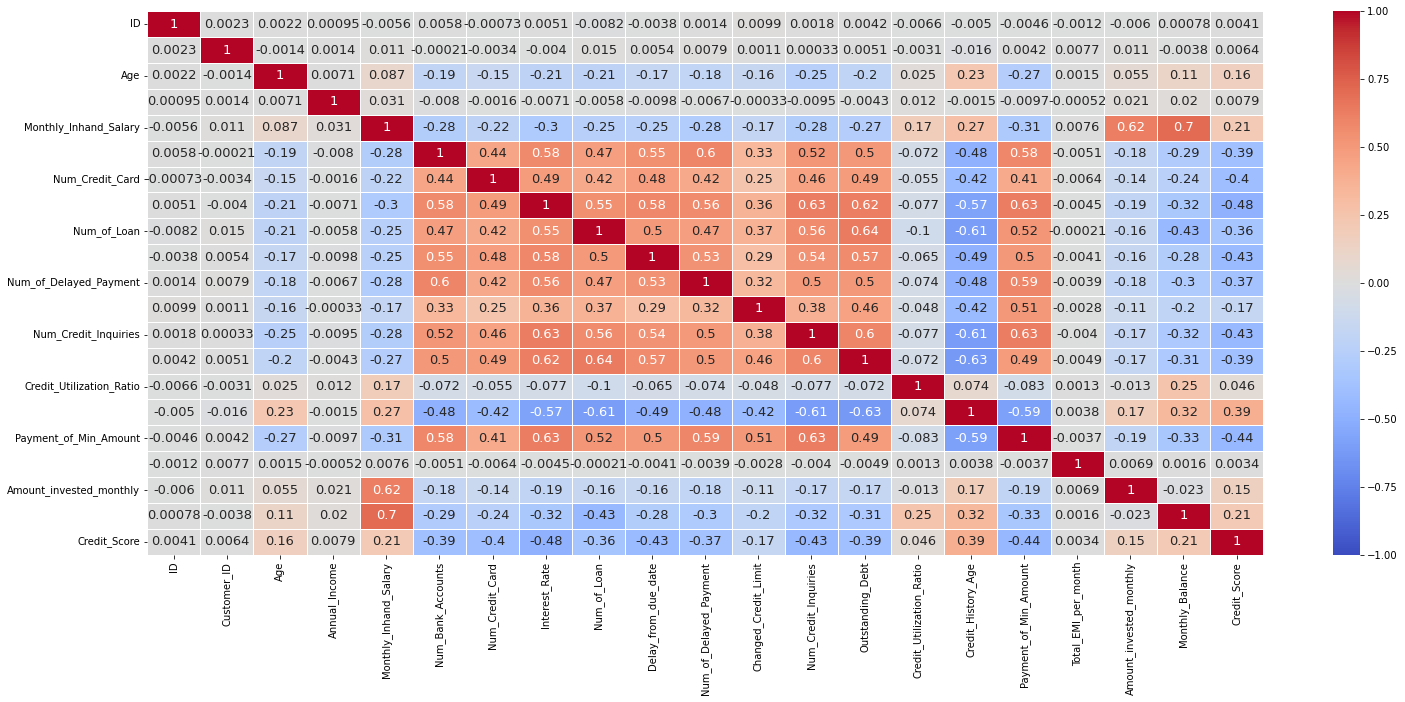

In [51]:
sns.heatmap(corr_mat , cmap='coolwarm', vmin=-1, vmax=1, annot=True, linewidths=1.0, annot_kws={"fontsize":13})

plt.gcf().set_size_inches(25, 10)

Признаки **ID** и **Customer_ID** некоррелируют ни с одним из признаков, что логично, потому что это просто индексы в системе. Признаки **Age** и **Annual_Income** тоже, что тоже логично, так как возраст человека не особенно влияет на его финансовое поведение, как и годовой доход человека не зависит от количества счетов, кредитов и т.д.

Признак **Monthly_Inhand_Salary** довольно сильно коррелирует с **Amount_Invested_monthly**  и **Monthly_Balance**, что означает, что от месячной зарплаты клиенты очень сильно зависят баланс клиента и его сумма, потраченная на инвестиции.

Количество банковских аккаунтов не сильно, но зависит от количества кредитных карт, процентной ставки, количества кредитов, количества задержанных платежей, выплаты минимальной суммы и количества запросов к кредитным картам (**Num_Bank_Accounts** и **Num_Credit_Card**, **Interest_Rate**, **Num_of_Loan**, **Delay_from_due_date**, **Changed_Credit_Limit**,  **Num_Credit_Inquiries**, **Outstanding_Debt**). Все признаки, перечисленные здесь коррелируют между друг другом довольно сильно, что логично, т.к. это характеристики непосредственного поведения клиента в финансовой компании (банке).

Заметим отрицательную корреляцию между признаками **Credit_History_Age** и **Num_Bank_Accounts**, что означает, что чем больше лет клиент держит счет, тем меньше он заводит банковских аккаунтов. Аналогичная ситуация так же с количеством кредитных карт и кредитов. Так же видимо, чем дольше клиент пользуется картой, тем меньше на ней процентная ставка.
Интересная корреляция наблюдается у признаков **Credit_History_Age** и **Delay_from_due_date**, **Num_of_Delayed_Payment**, **Outstanding_Debt**, **Payment_of_Min_Amount** получается, что скажем так, чем "старше" клиент, тем меньше у него возникает проблем, с тем что бы выплачивать задолженности.

В целом, зависимости вполне объяснимы и ожидаемы.

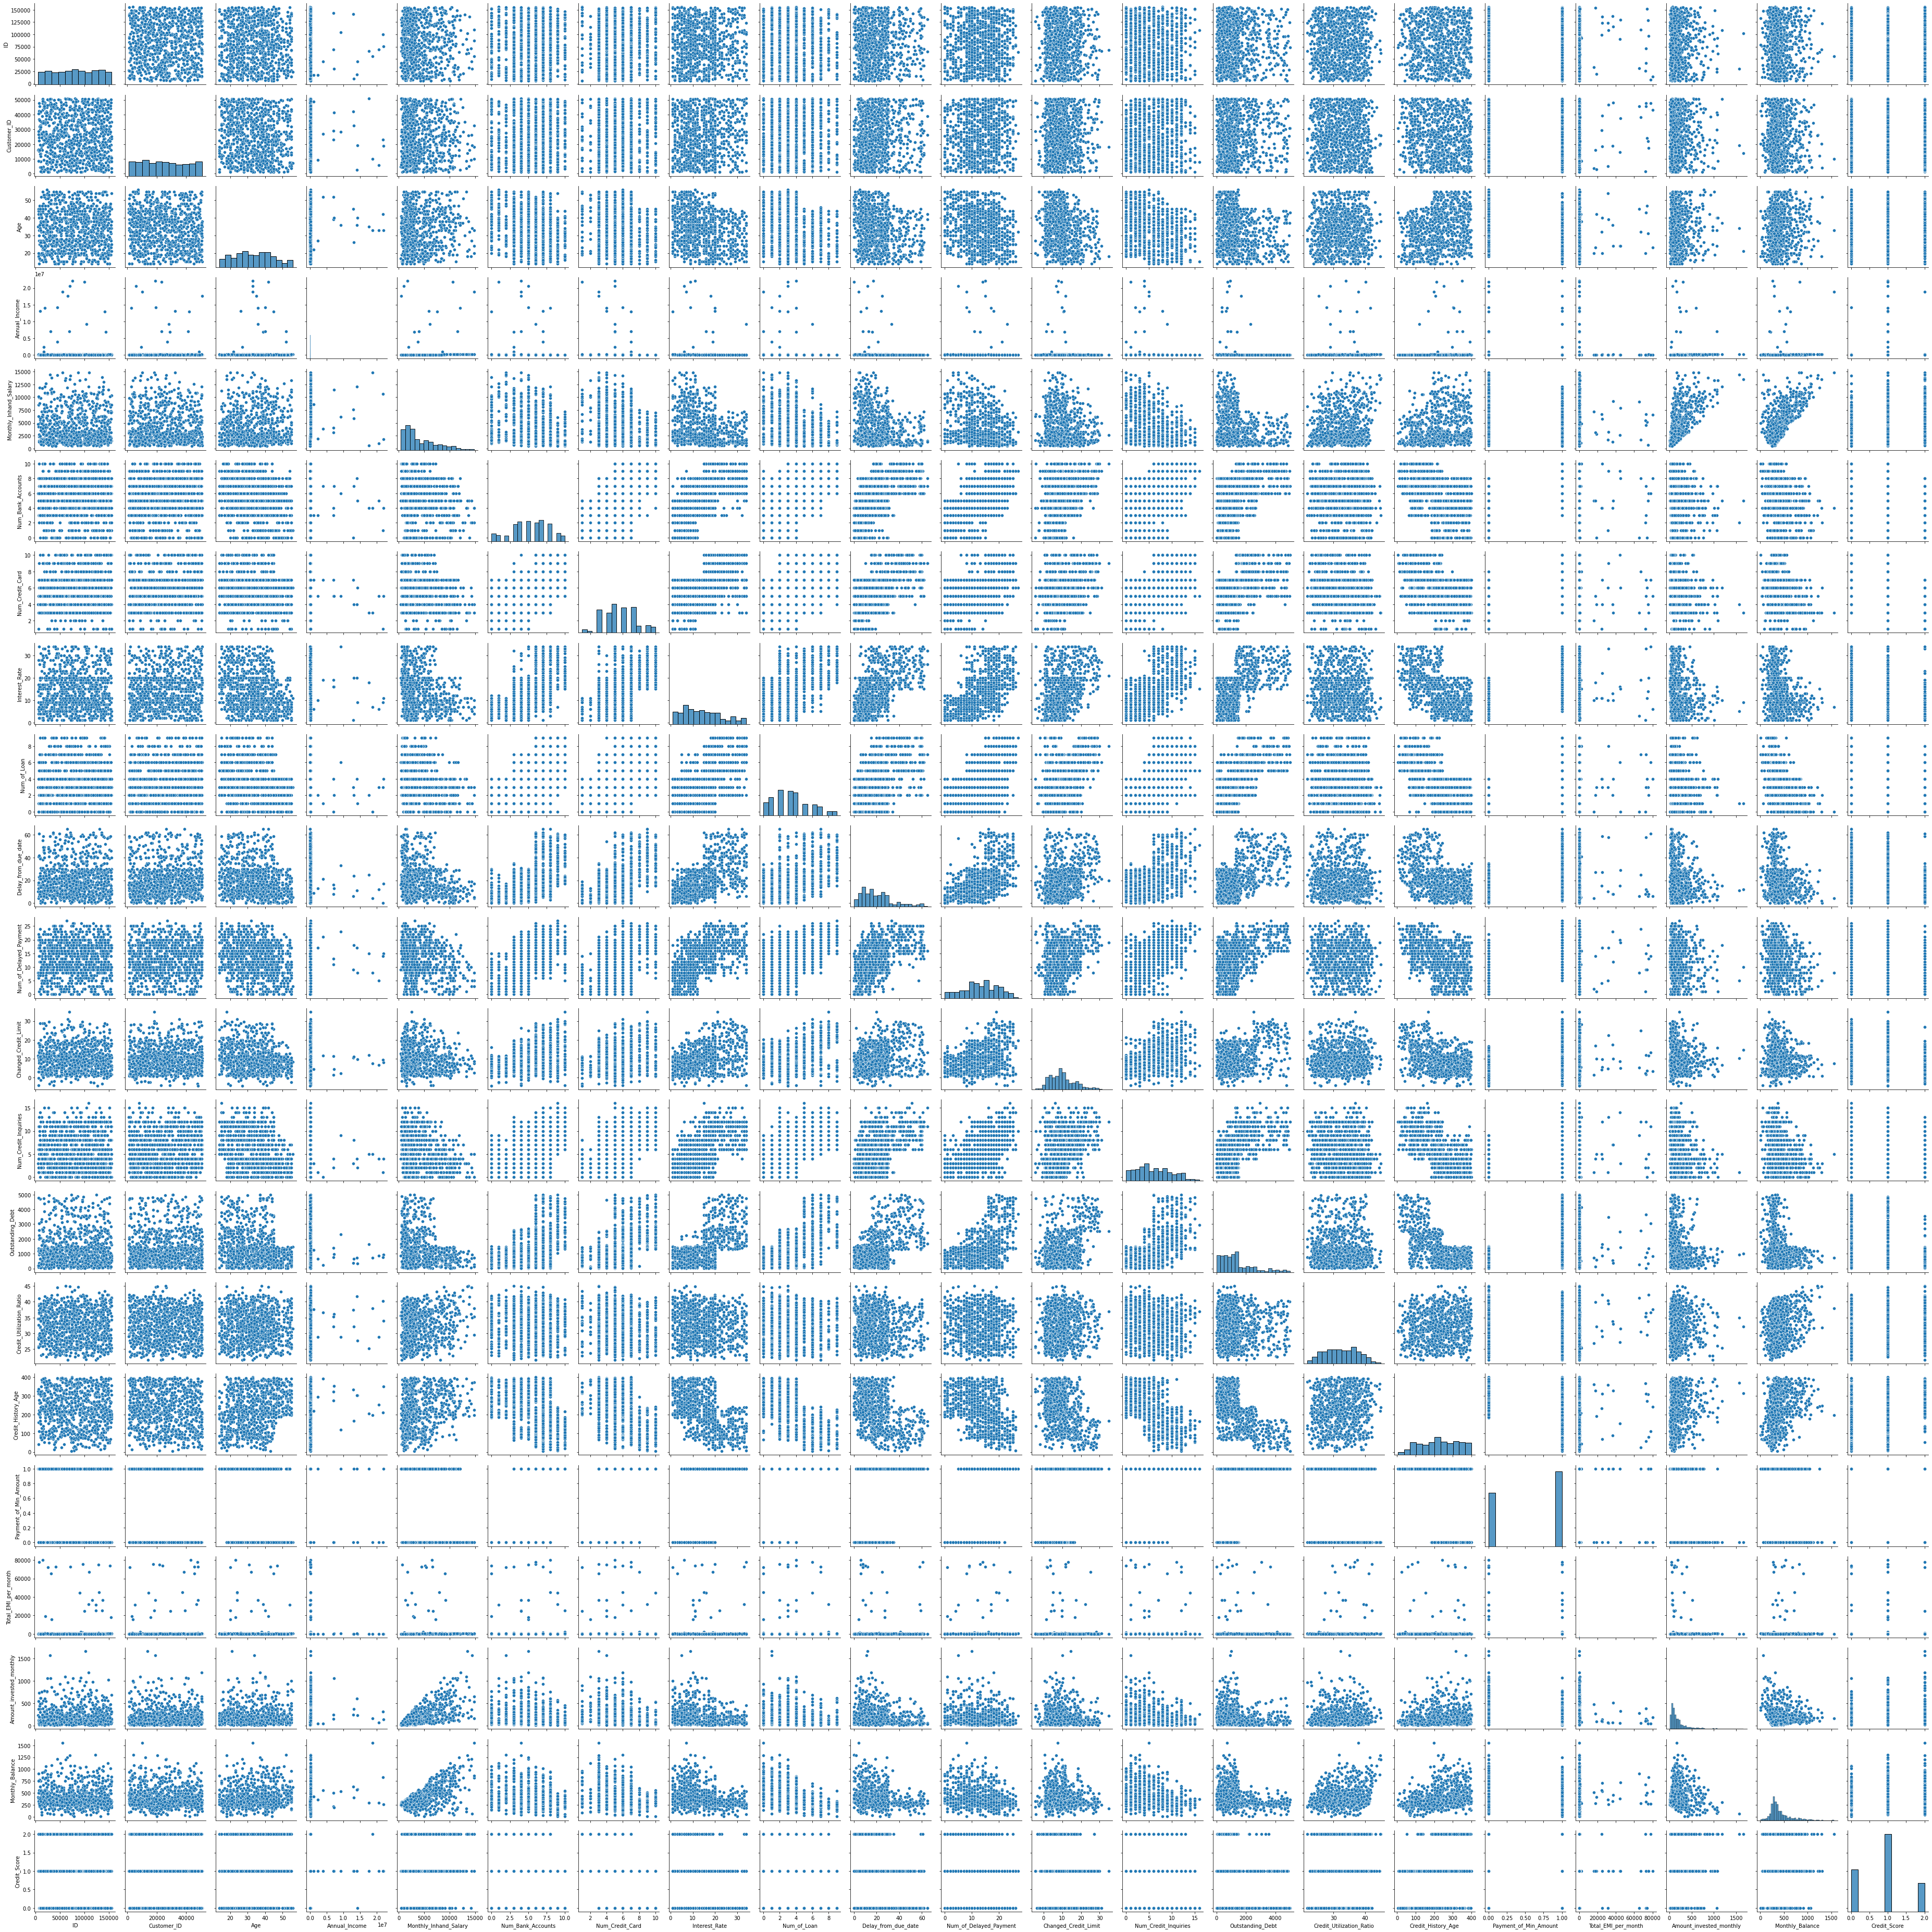

In [52]:
np.random.seed(42)

random_subset = np.random.choice(np.arange(clean_credit_data.shape[0]), size=1000, replace=False)

sns.pairplot(clean_credit_data.iloc[random_subset], diag_kind="hist")

pass

### 3.Обработка пропущенных значений

Пропущенные значения в таблице представлены значениями NaN. Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [53]:
clean_credit_data.isna().sum() 

ID                              0
Customer_ID                     0
Month                           0
Name                         9265
Age                          2577
SSN                          5150
Occupation                   6524
Annual_Income                   0
Monthly_Inhand_Salary       13927
Num_Bank_Accounts              20
Num_Credit_Card                 0
Interest_Rate                1890
Num_of_Loan                  3618
Type_of_Loan                10514
Delay_from_due_date           537
Num_of_Delayed_Payment       6566
Changed_Credit_Limit         1940
Num_Credit_Inquiries         1839
Credit_Mix                  18664
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8381
Payment_of_Min_Amount       11118
Total_EMI_per_month             0
Amount_invested_monthly      8106
Payment_Behaviour            7047
Monthly_Balance              1120
Credit_Score                    0
dtype: int64

В качестве обработки пропущенных значений заполним их медианой (для количественных признаков) или модой (для номинальных признаков).

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [54]:
clean_credit_data.fillna(clean_credit_data.median(axis = 0), axis=0 , inplace=True)

clean_credit_data.isna().sum() 

C:\Temp\ipykernel_10772\4293509444.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  clean_credit_data.fillna(clean_credit_data.median(axis = 0), axis=0 , inplace=True)


ID                              0
Customer_ID                     0
Month                           0
Name                         9265
Age                             0
SSN                          5150
Occupation                   6524
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10514
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                  18664
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour            7047
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:

In [55]:
clean_credit_data['Name'].fillna(clean_credit_data['Name'].mode().iloc[0], inplace=True)
clean_credit_data['SSN'].fillna(clean_credit_data['SSN'].mode().iloc[0], inplace=True)
clean_credit_data['Occupation'].fillna(clean_credit_data['Occupation'].mode().iloc[0], inplace=True)
clean_credit_data['Type_of_Loan'].fillna(clean_credit_data['Type_of_Loan'].mode().iloc[0], inplace=True)
clean_credit_data['Credit_Mix'].fillna(clean_credit_data['Credit_Mix'].mode().iloc[0], inplace=True)
clean_credit_data['Payment_Behaviour'].fillna(clean_credit_data['Payment_Behaviour'].mode().iloc[0], inplace=True)

clean_credit_data.isna().sum() 

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

Все пропущенные значения обработаны, взглянем еще раз на основные характеристики:

In [56]:
clean_credit_data.describe()

ID   Customer_ID           Age  Annual_Income  \
count   92653.000000  92653.000000  92653.000000   9.265300e+04   
mean    80616.278782  25981.250947     33.299602   1.766188e+05   
std     43297.801732  14338.656852     10.628729   1.431610e+06   
min      5634.000000   1006.000000     14.000000   7.005930e+03   
25%     43091.000000  13654.000000     25.000000   1.945305e+04   
50%     80604.000000  25800.000000     33.000000   3.757861e+04   
75%    118116.000000  38388.000000     41.000000   7.279092e+04   
max    155629.000000  50999.000000     99.000000   2.419806e+07   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           92653.000000       92653.000000     92653.000000   
mean             4027.754392           5.379016         5.532017   
std              2957.099840           2.585684         2.059262   
min               303.645417           0.000000         1.000000   
25%              1792.990833           3.000000         4.000000   
50%              3093.153333           6.000000         5.000000   
75%              5379.470000           7.000000         7.000000   
max             15204.633333          10.000000        10.000000   

       Interest_Rate   Num_of_Loan  Delay_from_due_date  ...  \
count   92653.000000  92653.000000         92653.000000  ...   
mean       14.526243      3.514360            21.200652  ...   
std         8.702582      2.398899            14.729479  ...   
min         1.000000      0.000000             0.000000  ...   
25%         8.000000      2.000000            10.000000  ...   
50%        13.000000      3.000000            18.000000  ...   
75%        20.000000      5.000000            28.000000  ...   
max       100.000000      9.000000            67.000000  ...   

       Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  \
count          92653.000000          92653.000000      92653.000000   
mean              10.383507              5.750834       1425.390476   
std                6.720529              3.780641       1154.575793   
min               -6.490000              0.000000          0.230000   
25%                5.430000              3.000000        565.480000   
50%                9.420000              5.000000       1165.700000   
75%               14.700000              8.000000       1945.670000   
max               36.970000             16.000000       4998.070000   

       Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
count              92653.000000        92653.000000           92653.000000   
mean                  32.281487          220.879421               0.645235   
std                    5.118167           95.143036               0.478444   
min                   20.000000            1.000000               0.000000   
25%                   28.047027          154.000000               0.000000   
50%                   32.296084          219.000000               1.000000   
75%                   36.499986          292.000000               1.000000   
max                   50.000000          404.000000               1.000000   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  \
count         92653.000000             92653.000000     92653.000000   
mean           1410.215095               189.533521       401.559000   
std            8328.129437               191.145238       212.301467   
min               0.000000                 0.000000         0.007760   
25%              30.419540                76.980851       270.918433   
50%              69.272824               128.907111       336.756690   
75%             161.163199               219.656201       467.393908   
max           82331.000000              1977.326102      1602.040519   

       Credit_Score  
count  92653.000000  
mean       0.886901  
std        0.673570  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        2.000000  

[8 rows x 21 columns]

In [57]:
clean_credit_data.describe(include=['category'])

Month    Name          SSN Occupation   Type_of_Loan Credit_Mix  \
count     92653   92653        92653      92653          92653      92653   
unique        8   10137        12499         15           6260          3   
top     January  Langep  000-86-6182     Lawyer  Not Specified   Standard   
freq      11643    9307         5158      12619          11824      52726   

                     Payment_Behaviour  
count                            92653  
unique                               6  
top     Low_spent_Small_value_payments  
freq                             30600

### 4.Обработка категориальных признаков

Для дальнейшей обработки данных закодируем категориальные признаки с помощью числовых.

Бинарные признаки **Payment_of_Min_Amount** заменим на числовой (0 и 1). К небинарным признакам **Month**, **Occupation**, **Type_of_Loan**, **Credit_Mix**, **Payment_Behaviour** применим метод бинаризации (one-hot encoding).

#### 4.5 Отбор признаков

Для предсказания кредитного рейтинга клиента будем использовать все входные признаки, кроме **Name**, **SNN**, **ID**, **Customer_ID**, **Month**. Так же можно исключить **Type_of_Loan**, гораздо нагляднее себя ведёт признак **Credit_Mix**.

In [58]:
cat_credit_data = clean_credit_data
cat_credit_data = cat_credit_data.drop(["Name"], axis=1)
cat_credit_data = cat_credit_data.drop(["SSN"], axis=1)
cat_credit_data = cat_credit_data.drop(["ID"], axis=1)
cat_credit_data = cat_credit_data.drop(["Customer_ID"], axis=1)
cat_credit_data = cat_credit_data.drop(["Month"], axis=1)
cat_credit_data = cat_credit_data.drop(["Type_of_Loan"], axis=1)

cat_credit_data.head()

Age Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  23.0  Scientist       19114.12            1824.843333                3.0   
1  23.0  Scientist       19114.12            3093.153333                3.0   
2  33.0  Scientist       19114.12            3093.153333                3.0   
3  23.0  Scientist       19114.12            3093.153333                3.0   
4  23.0  Scientist       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                4            3.0          4.0                  3.0   
1                4            3.0          4.0                 18.0   
2                4            3.0          4.0                  3.0   
3                4            3.0          4.0                  5.0   
4                4            3.0          4.0                  6.0   

   Num_of_Delayed_Payment  ...  Credit_Mix  Outstanding_Debt  \
0                     7.0  ...    Standard            809.98   
1                    14.0  ...        Good            809.98   
2                     7.0  ...        Good            809.98   
3                     4.0  ...        Good            809.98   
4                    14.0  ...        Good            809.98   

  Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
0                26.822620               265.0                    0.0   
1                31.944960               219.0                    0.0   
2                28.609352               267.0                    0.0   
3                31.377862               268.0                    0.0   
4                24.797347               269.0                    0.0   

   Total_EMI_per_month  Amount_invested_monthly  \
0            49.574949                80.415295   
1            49.574949               118.280222   
2            49.574949                81.699521   
3            49.574949               199.458074   
4            49.574949                41.420153   

                  Payment_Behaviour  Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments       312.494089            2  
1    Low_spent_Large_value_payments       284.629162            2  
2   Low_spent_Medium_value_payments       331.209863            2  
3    Low_spent_Small_value_payments       223.451310            2  
4  High_spent_Medium_value_payments       341.489231            2  

[5 rows x 22 columns]

Отбор признаков завершен.

In [59]:
cat_credit_data['Payment_of_Min_Amount'] = pd.factorize(cat_credit_data['Payment_of_Min_Amount'])[0]

Occupation_dummies = pd.get_dummies(cat_credit_data['Occupation'])
Credit_Mix_dummies = pd.get_dummies(cat_credit_data['Credit_Mix'])
Payment_Behaviour_dummies = pd.get_dummies(cat_credit_data['Payment_Behaviour'])

Occupation_dummies.head()

Accountant  Architect  Developer  Doctor  Engineer  Entrepreneur  \
0           0          0          0       0         0             0   
1           0          0          0       0         0             0   
2           0          0          0       0         0             0   
3           0          0          0       0         0             0   
4           0          0          0       0         0             0   

   Journalist  Lawyer  Manager  Mechanic  Media_Manager  Musician  Scientist  \
0           0       0        0         0              0         0          1   
1           0       0        0         0              0         0          1   
2           0       0        0         0              0         0          1   
3           0       0        0         0              0         0          1   
4           0       0        0         0              0         0          1   

   Teacher  Writer  
0        0       0  
1        0       0  
2        0       0  
3        0       0  
4        0       0

Добавим dummy-столбцы к таблице и удалим столбцы категориальных признаков:

In [60]:
cat_credit_data = pd.concat((cat_credit_data, Occupation_dummies), axis=1)
cat_credit_data = pd.concat((cat_credit_data, Credit_Mix_dummies), axis=1)
cat_credit_data = pd.concat((cat_credit_data, Payment_Behaviour_dummies), axis=1)

cat_credit_data = cat_credit_data.drop(['Occupation'], axis=1)
cat_credit_data = cat_credit_data.drop(['Credit_Mix'], axis=1)
cat_credit_data = cat_credit_data.drop(['Payment_Behaviour'], axis=1)

cat_credit_data

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      23.0       19114.12            1824.843333                3.0   
1      23.0       19114.12            3093.153333                3.0   
2      33.0       19114.12            3093.153333                3.0   
3      23.0       19114.12            3093.153333                3.0   
4      23.0       19114.12            1824.843333                3.0   
...     ...            ...                    ...                ...   
99995  25.0       39628.99            3359.415833                4.0   
99996  25.0       39628.99            3359.415833                4.0   
99997  25.0       39628.99            3359.415833                4.0   
99998  25.0       39628.99            3359.415833                4.0   
99999  25.0       39628.99            3359.415833                4.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                    4            3.0          4.0                  3.0   
1                    4            3.0          4.0                 18.0   
2                    4            3.0          4.0                  3.0   
3                    4            3.0          4.0                  5.0   
4                    4            3.0          4.0                  6.0   
...                ...            ...          ...                  ...   
99995                6            7.0          2.0                 23.0   
99996                6            7.0          2.0                 18.0   
99997                6           13.0          2.0                 27.0   
99998                6            7.0          2.0                 20.0   
99999                6            7.0          2.0                 18.0   

       Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Writer  Bad  Good  \
0                         7.0                 11.27  ...       0    0     0   
1                        14.0                 11.27  ...       0    0     1   
2                         7.0                  9.42  ...       0    0     1   
3                         4.0                  6.27  ...       0    0     1   
4                        14.0                 11.27  ...       0    0     1   
...                       ...                   ...  ...     ...  ...   ...   
99995                     7.0                 11.50  ...       0    0     0   
99996                     7.0                 11.50  ...       0    0     0   
99997                     6.0                 11.50  ...       0    0     1   
99998                    14.0                 11.50  ...       0    0     1   
99999                     6.0                 11.50  ...       0    0     1   

       Standard  High_spent_Large_value_payments  \
0             1                                0   
1             0                                0   
2             0                                0   
3             0                                0   
4             0                                0   
...         ...                              ...   
99995         1                                1   
99996         1                                0   
99997         0                                1   
99998         0                                0   
99999         0                                0   

       High_spent_Medium_value_payments  High_spent_Small_value_payments  \
0                                     0                                1   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     1                                0   
...                                 ...                              ...   
99995                                 0                                0   
99996                                 1                     

### 5.Нормализация

Нормализация (normalization) и стандартизация (standardization) являются методами изменения диапазонов значений – шкалирования. Разные атрибуты могут измеряться в разных диапазонах, или значения одного атрибута варьируются слишком сильно. Например, один атрибут может имеет диапазон от 0 до 1, а второй — от 1 до 1000. Тогда второй атрибут оказывает большее влияние на обучение, хотя не факт, что он является более важным, чем первый.

Нормализация подразумевает изменение диапазонов в данных без изменения формы распределения,

Стандартизация изменяет форму распределения данных (приводится к нормальному распределению).

В дальнейшем мы будем использовать алгоритм k ближайших соседей, основанный на измерении расстояний, в таких случаях лучше применять стандартизацию. Выполним стандартизацию всех признаков:

In [61]:
credit_data_stand = (cat_credit_data - cat_credit_data.mean(axis = 0))/cat_credit_data.std(axis = 0)

credit_data_stand.head()


Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0 -0.969034      -0.110019              -0.744957          -0.920072   
1 -0.969034      -0.110019              -0.316053          -0.920072   
2 -0.028188      -0.110019              -0.316053          -0.920072   
3 -0.969034      -0.110019              -0.316053          -0.920072   
4 -0.969034      -0.110019              -0.744957          -0.920072   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0        -0.743964      -1.324462     0.202443            -1.235662   
1        -0.743964      -1.324462     0.202443            -0.217296   
2        -0.743964      -1.324462     0.202443            -1.235662   
3        -0.743964      -1.324462     0.202443            -1.099880   
4        -0.743964      -1.324462     0.202443            -1.031988   

   Num_of_Delayed_Payment  Changed_Credit_Limit  ...    Writer       Bad  \
0               -1.076307              0.131908  ... -0.250579 -0.483945   
1                0.096665              0.131908  ... -0.250579 -0.483945   
2               -1.076307             -0.143368  ... -0.250579 -0.483945   
3               -1.579009             -0.612081  ... -0.250579 -0.483945   
4                0.096665              0.131908  ... -0.250579 -0.483945   

       Good  Standard  High_spent_Large_value_payments  \
0 -0.563749  0.870199                        -0.398404   
1  1.773821 -1.149150                        -0.398404   
2  1.773821 -1.149150                        -0.398404   
3  1.773821 -1.149150                        -0.398404   
4  1.773821 -1.149150                        -0.398404   

   High_spent_Medium_value_payments  High_spent_Small_value_payments  \
0                         -0.461643                         2.789509   
1                         -0.461643                        -0.358482   
2                         -0.461643                        -0.358482   
3                         -0.461643                        -0.358482   
4                          2.166152                        -0.358482   

   Low_spent_Large_value_payments  Low_spent_Medium_value_payments  \
0                       -0.341225                        -0.401635   
1                        2.930587                        -0.401635   
2                       -0.341225                         2.489795   
3                       -0.341225                        -0.401635   
4                       -0.341225                        -0.401635   

   Low_spent_Small_value_payments  
0                       -0.702226  
1                       -0.702226  
2                       -0.702226  
3                        1.424027  
4                       -0.702226  

[5 rows x 43 columns]

### 6.Разбиение данных на обучающую и тестовую выборку

Для определения кредитного рейтинга клиента будем использовать все входные признаки:

In [62]:
X = credit_data_stand.drop(["Credit_Score"], axis=1)

y = cat_credit_data["Credit_Score"]

X.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0 -0.969034      -0.110019              -0.744957          -0.920072   
1 -0.969034      -0.110019              -0.316053          -0.920072   
2 -0.028188      -0.110019              -0.316053          -0.920072   
3 -0.969034      -0.110019              -0.316053          -0.920072   
4 -0.969034      -0.110019              -0.744957          -0.920072   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0        -0.743964      -1.324462     0.202443            -1.235662   
1        -0.743964      -1.324462     0.202443            -0.217296   
2        -0.743964      -1.324462     0.202443            -1.235662   
3        -0.743964      -1.324462     0.202443            -1.099880   
4        -0.743964      -1.324462     0.202443            -1.031988   

   Num_of_Delayed_Payment  Changed_Credit_Limit  ...    Writer       Bad  \
0               -1.076307              0.131908  ... -0.250579 -0.483945   
1                0.096665              0.131908  ... -0.250579 -0.483945   
2               -1.076307             -0.143368  ... -0.250579 -0.483945   
3               -1.579009             -0.612081  ... -0.250579 -0.483945   
4                0.096665              0.131908  ... -0.250579 -0.483945   

       Good  Standard  High_spent_Large_value_payments  \
0 -0.563749  0.870199                        -0.398404   
1  1.773821 -1.149150                        -0.398404   
2  1.773821 -1.149150                        -0.398404   
3  1.773821 -1.149150                        -0.398404   
4  1.773821 -1.149150                        -0.398404   

   High_spent_Medium_value_payments  High_spent_Small_value_payments  \
0                         -0.461643                         2.789509   
1                         -0.461643                        -0.358482   
2                         -0.461643                        -0.358482   
3                         -0.461643                        -0.358482   
4                          2.166152                        -0.358482   

   Low_spent_Large_value_payments  Low_spent_Medium_value_payments  \
0                       -0.341225                        -0.401635   
1                        2.930587                        -0.401635   
2                       -0.341225                         2.489795   
3                       -0.341225                        -0.401635   
4                       -0.341225                        -0.401635   

   Low_spent_Small_value_payments  
0                       -0.702226  
1                       -0.702226  
2                       -0.702226  
3                        1.424027  
4                       -0.702226  

[5 rows x 42 columns]

In [63]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Credit_Score, dtype: int64

Разобьем данные на обучающую и тестовую выборку в пропорции 3:1 (75% обучающей выборки, 25% - тестовой)

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

X_train.shape, X_test.shape

((69489, 42), (23164, 42))

### 7.Классификатор ***k***-ближайших соседей

Проведем обучение с помощью k-nearest neighbors algorithm (k-NN) и вычислим ошибки на обучающей выборке и тестовой:

2 соседа:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2, p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.16202564434658723, 0.3382835434294595)

3 соседа:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.16314812416353666, 0.31993610775341047)

6 соседей:

In [ ]:
model = KNeighborsClassifier(n_neighbors=6, p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.2182791520960152, 0.30793472629943014)

15 соседей:

In [ ]:
model_15 = KNeighborsClassifier(n_neighbors=15, p=1)
model_15.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15, p=1)

In [ ]:
y_train_pred_15 = model_15.predict(X_train)
y_test_pred_15 = model_15.predict(X_test)

np.mean(y_train != y_train_pred_15), np.mean(y_test != y_test_pred_15)

(0.26267466793305416, 0.30832326023139356)

25 соседей:

In [ ]:
model_25 = KNeighborsClassifier(n_neighbors=25, p=1)
model_25.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25, p=1)

In [ ]:
y_train_pred_25 = model_25.predict(X_train)
y_test_pred_25 = model_25.predict(X_test)

np.mean(y_train != y_train_pred_25), np.mean(y_test != y_test_pred_25)

(0.28159852638547106, 0.3122085995510275)

### 8.Вычисление ошибок на обучающей и тестовой выборках

Выпишем значения ошибок:

| Количество соседей | Ошибка на обучающей выборке | Ошибка на тестовой выборке |
| :----------------: | :--------------------------: | :------------------------: |
| 2 соседа | 0.162 (т.е. 16,2%) | 0.3383 (т.е. 33,83%) |
| 3 соседа | 0.1631 (т.е. 16,31%) | 0.3199 (т.е. 31,99%)|
| 6 соседей | 0.2183 (т.е. 21,83%)| 0.3079 (т.е. 30,79%)  |
| 15 соседей | 0.2627 (т.е. 26,27%)| 0.3084 (т.е. 30,84%) |
| 25 соседей | 0.2816 (т.е. 28,16%) | 0.3122 (т.е. 31,22%) |

### 12.Общие выводы

В результа данной работы, было реализовано обучение модели, предсказывающей кредитный рейтинг клиента крупной финансовой компании. Обучение проводилось с помощью метода k ближайших соседей.

В случае с методом k ближайших соседей, при подборе оптимальных параметров метода и предварительной обработки данных, был получен процент ошибок, указанных в пункте 8.

По данным ошибок можно сделать выводы: что лучше всего себя показал медот при 2 соседях на обучающей выборке и при 6 на тестовой, в целом, думаю, можно считать, что лучше всего себя показал метод при 6 соседях, так он дал минимальную ошибку на тестовой выборке. Хуже всег себя показали: метод при 25 соседях на обучающей выборке и при 2 соседях на обучающей и, соответсвенно, в общем хуже всех сработал метод на 2х соседях, так как, опять же, самая большая ошибка на тестовой выборке.

Такой большой процент ошибок может быть обусловлен тем, что при составлении таблицы авторы учли не все влияющие на исход признаки и, возможно, улучшение результатов при применении другого метода обучения модели (т.к. метод ***k*** показал себя не очень хорошо).

### 13.Обучение нейронной сети

In [65]:
# Подключаем специальные библиотеки
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

Необходимо на подготовленных данных обучить полносвязную (неглубокую) неоронную сеть.

Попробовать 1-2 скрытых слоя.

Построить графики зависимости ошибки на обучающей и тестовой выборках от параметра alpha и от количества нейронов.

Наблюдается ли переобучение или недообучение?

Сделать соответствующие выводы.

#### 13.1) 1 скрытый слой, разное количество нейронов на скрытом слое

Используем несколько моделей, которые обучим на данных (использовать будем одни и те же).

Отличия между моделями будет в значении параметра alpha и количестве нейронов на единственном скрытом слое.

Для каждой модели будем считать ошибку и точность и на тестовой и на обучающей выборке.

In [80]:
trainError_1 = []
testError_1 = []

trainCorrect_1 = []
testCorrect_1 = []

#Массив параметров alpha
alphaArr_1 = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]
#Количество нейронов на скрытом слое
NArr_1 = [1, 3, 5, 10, 20, 50, 70, 100, 150, 200, 250, 300]

Train_accuracy_1 = pd.DataFrame(0., index = alphaArr_1, columns = NArr_1)
Test_accuracy_1 = pd.DataFrame(0., index = alphaArr_1, columns = NArr_1)

Train_error_1 = pd.DataFrame(0., index = alphaArr_1, columns = NArr_1)
Test_error_1 = pd.DataFrame(0., index = alphaArr_1, columns = NArr_1)

for count_narr in NArr_1 :
    for alpha in alphaArr_1 :

        print(count_narr, alpha)

        mlp_model = MLPClassifier(hidden_layer_sizes = (count_narr, 1),
                                solver = 'lbfgs', 
                                activation = 'logistic',
                                random_state = 42,
                                alpha = alpha)

        mlp_model.fit(X_train, y_train)

        y_train_predict = mlp_model.predict(X_train)
        y_test_predict  = mlp_model.predict(X_test)

        Train_error_1[count_narr][alpha] = np.mean(y_train != y_train_predict)
        Test_error_1[count_narr][alpha] = np.mean(y_test != y_test_predict)
        Train_accuracy_1[count_narr][alpha] = accuracy_score(y_train, y_train_predict)
        Test_accuracy_1[count_narr][alpha] = accuracy_score(y_test, y_test_predict)

1 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


1 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


1 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


1 0.1
1 0.5
1 1
1 5
1 10
1 50
1 100
3 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 10
3 50
3 100
5 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 0.1
5 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 50
5 100
10 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 50


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 100


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 50


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 100


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 50


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 100
70 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 50


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 100
100 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 50


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 100
150 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 50


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 100
200 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 50


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 100
250 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 50
250 100
300 0.0001
300 0.001
300 0.01
300 0.1
300 0.5
300 1
300 5
300 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 50


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 100


Проверим, какая вышла максимальная точность и минимальная ошибка.

In [81]:
max_accuracy_test_1 = Test_accuracy_1.values.max()
max_accuracy_train_1 = Train_accuracy_1.values.max()

min_error_test_1 = Test_error_1.values.min()
min_error_train_1 = Train_error_1.values.min()

Mask = ((Test_accuracy_1 == max_accuracy_test_1) | (Train_accuracy_1 == max_accuracy_train_1) | 
    (Test_error_1 == min_error_test_1) | (Train_error_1 == min_error_train_1))

print("Минимальная ошибка: ")
print("на обучабщей выборке: ", min_error_train_1)
print("на тестовой выборке: ", min_error_test_1 )
print("Максимальная точность: ")
print("на обучабщей выборке: ", max_accuracy_train_1)
print("на тестовой выборке: ", max_accuracy_test_1)

Минимальная ошибка: 
на обучабщей выборке:  0.3025514829685274
на тестовой выборке:  0.3155327231911587
Максимальная точность: 
на обучабщей выборке:  0.6974485170314726
на тестовой выборке:  0.6844672768088413


Теперь попробуем построить график ошибок от параметра alpha в виде тепловой карты.

График представит собой вывод значений в зависимоти от параметра. На пересечении параметров находятся ячейки, которые закрашиваются в определенный цвет.

Соответственно чем холоднее цвет, тем лучше полученное значение. Так же в ячейке с лучшим результатом написано соответсвующее значение ошибки.

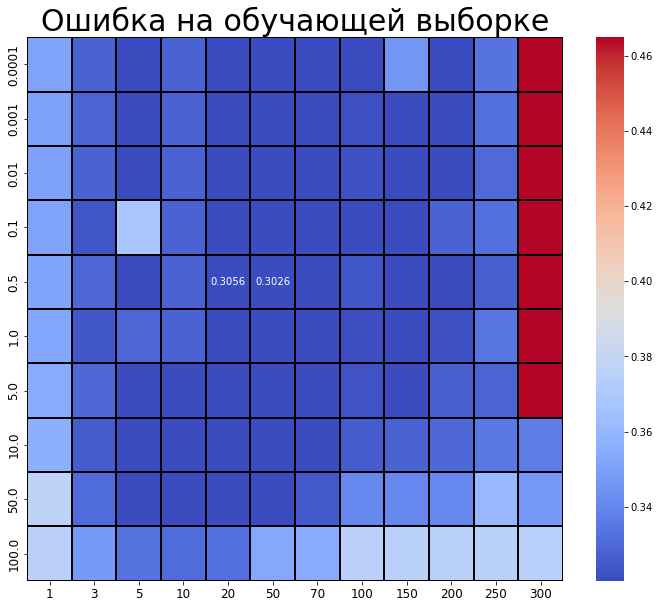

In [92]:
plt.figure(figsize=(12, 10))
plt.plot()
sns.heatmap(Train_error_1, annot = round(Train_error_1[Mask], 4).fillna(''),
            cmap = 'coolwarm', fmt='', linewidths=2, linecolor='black',
            vmin = Train_error_1.quantile(0.9).min())
plt.title('Ошибка на обучающей выборке', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

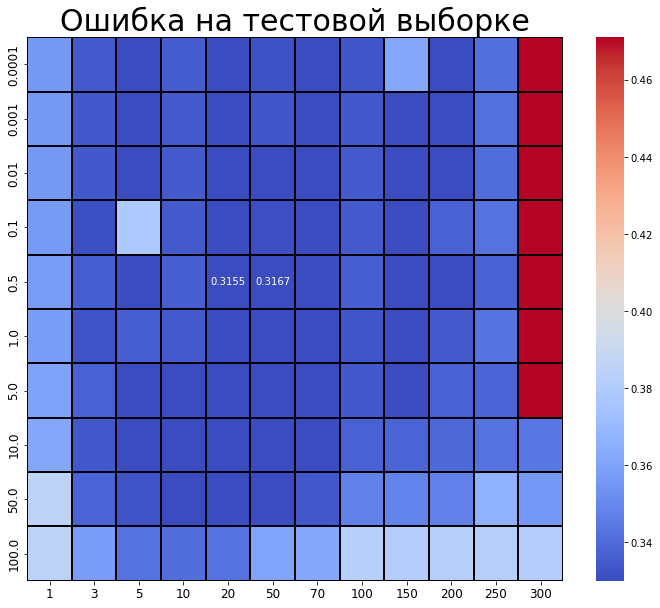

In [93]:
plt.figure(figsize=(12, 10))
plt.plot()
sns.heatmap(Test_error_1, annot = round(Test_error_1[Mask], 4).fillna(''),
            cmap = 'coolwarm', fmt='', linewidths=2, linecolor='black',
            vmin = Test_error_1.quantile(0.9).min())
plt.title('Ошибка на тестовой выборке', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Попробуем построить график ошибок на выборках от параметра alpha при оптимальном количестве нейронов на слое (т.е. при таких N, которые соответсвуют ячейкам минимума не тепловых картах выше).

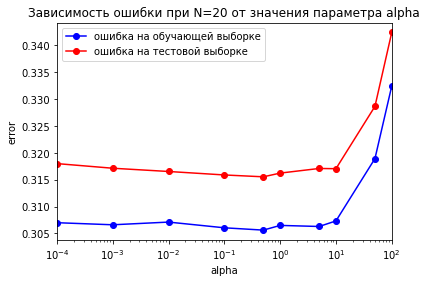

In [105]:
# график ломаной 
plt.semilogx(alphaArr_1, Train_error_1[20], 'b-o', label = 'ошибка на обучающей выборке')
plt.semilogx(alphaArr_1, Test_error_1[20], 'r-o', label = 'ошибка на тестовой выборке')
plt.xlim([np.min(alphaArr_1), np.max(alphaArr_1)])
plt.title('Зависимость ошибки при N=20 от значения параметра alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

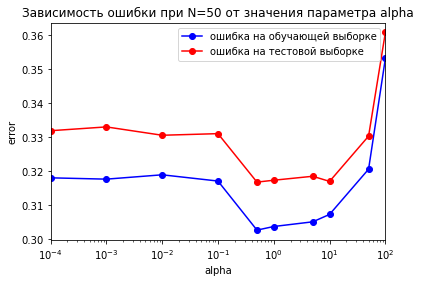

In [103]:
# график ломаной 
plt.semilogx(alphaArr_1, Train_error_1[50], 'b-o', label = 'ошибка на обучающей выборке')
plt.semilogx(alphaArr_1, Test_error_1[50], 'r-o', label = 'ошибка на тестовой выборке')
plt.xlim([np.min(alphaArr_1), np.max(alphaArr_1)])
plt.title('Зависимость ошибки при N=50 от значения параметра alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

Теперь посмотрим, как менялась метрика (точность) в зависисмости от гиперпараметра.

Построим, для начала, в виде тепловой карты. В данном случае, результат лучше, когда цвет теплее, т.к. это указывает на большее значение, что в случае точностинам и нужно.

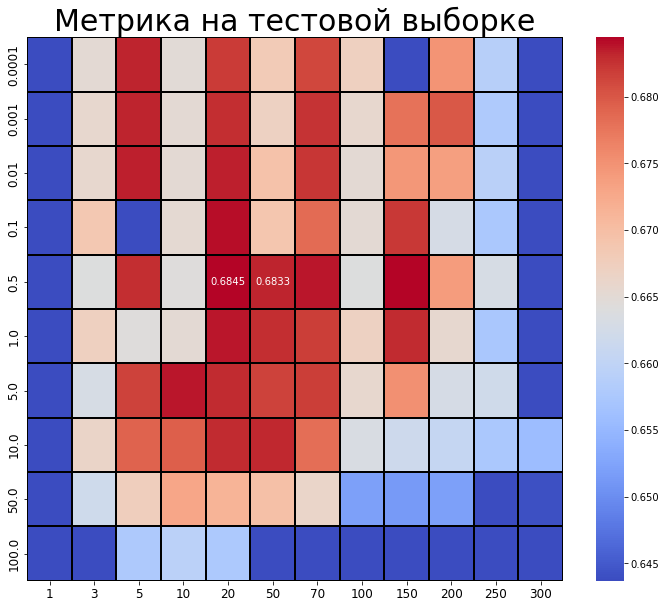

In [94]:
plt.figure(figsize=(12, 10))
plt.plot()
sns.heatmap(Test_accuracy_1, annot = round(Test_accuracy_1[Mask], 4).fillna(''),
            cmap = 'coolwarm', fmt='', linewidths=2, linecolor='black',
            vmin = Test_accuracy_1.quantile(0.9).min())
plt.title('Метрика на тестовой выборке', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

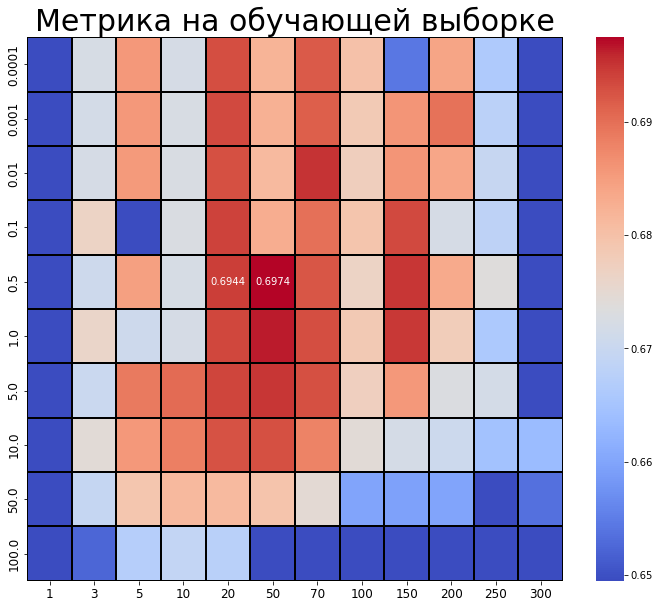

In [95]:
plt.figure(figsize=(12, 10))
plt.plot()
sns.heatmap(Train_accuracy_1, annot = round(Train_accuracy_1[Mask], 4).fillna(''),
            cmap = 'coolwarm', fmt='', linewidths=2, linecolor='black',
            vmin = Train_accuracy_1.quantile(0.9).min())
plt.title('Метрика на обучающей выборке', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show

Так же как и в случае ошибок попробуем построить график уже метрик на выборках от параметра alpha при оптимальном количестве нейронов на слое (т.е. при таких N, которые соответсвуют ячейкам максимума не тепловых картах выше).

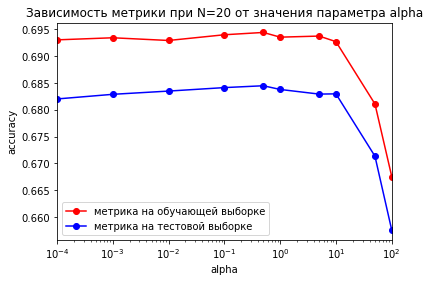

In [102]:
plt.semilogx(alphaArr_1, Train_accuracy_1[20], 'r-o', label = 'метрика на обучающей выборке')
plt.semilogx(alphaArr_1, Test_accuracy_1[20], 'b-o', label = 'метрика на тестовой выборке')
plt.xlim([np.min(alphaArr_1), np.max(alphaArr_1)])
plt.title('Зависимость метрики при N=20 от значения параметра alpha')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()

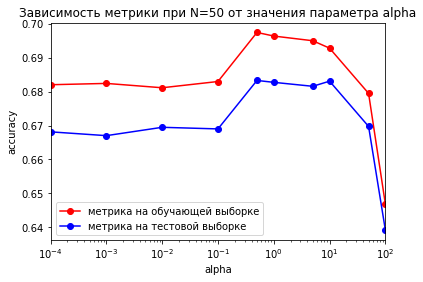

In [99]:
plt.semilogx(alphaArr_1, Train_accuracy_1[50], 'r-o', label = 'метрика на обучающей выборке')
plt.semilogx(alphaArr_1, Test_accuracy_1[50], 'b-o', label = 'метрика на тестовой выборке')
plt.xlim([np.min(alphaArr_1), np.max(alphaArr_1)])
plt.title('Зависимость метрики при N=50 от значения параметра alpha')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()

Учитывая, все приведенные графики, можем сделать вывод: что из набора значений гиперпараметра alpha = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100], оптимальным оказалось значение **alpha = 0.5**.
Оптимальным количеством нейронов на единственном скрытом слое оказались значения: **N = 20** и **N = 50**.

Поэтому, можем сделать выводы, что наиболее лучшимии вариантами получились пары параметров:

* **alpha** = 0.5, **N** = 20

* **alpha** = 0.5, **N** = 50

Переобучим две модели при таких параметрах и проанализируем результаты:

##### 13.1.1) **alpha** = 0.5, **N** = 20

In [69]:
mlp_model = MLPClassifier(hidden_layer_sizes = (20,1),
                            solver = 'lbfgs', 
                            activation = 'logistic',
                            random_state = 42,
                            alpha = 0.5)

mlp_model.fit(X_train, y_train)

y_train_predict = mlp_model.predict(X_train)
y_test_predict  = mlp_model.predict(X_test) 

c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [70]:
print(f'Ошибка на обучающей выборке     =  {np.mean(y_train != y_train_predict)}')
print(f'Ошибка на тестовой выборке      =  {np.mean(y_test != y_test_predict)}')
print(f'Метрика на обучающей выборке =  {accuracy_score(y_train, y_train_predict)}')
print(f'Метрика на тестовой выборке   =  {accuracy_score(y_test, y_test_predict)}')

Ошибка на обучающей выборке     =  0.30560232554792843
Ошибка на тестовой выборке      =  0.3155327231911587
Метрика на обучающей выборке =  0.6943976744520716
Метрика на тестовой выборке   =  0.6844672768088413


Выводы:

Из выше выведенных результатов ошибки и точности на выборках видим, что алгоритм справляется примерно одинаково и на тестовой и на обучающей выборке, что свидетельствует об отсутсвии недообучения или переобучения.

##### 13.1.2) **alpha** = 0.5, **N** = 50

In [71]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50,1),
                            solver = 'lbfgs', 
                            activation = 'logistic',
                            random_state = 42,
                            alpha = 0.5)

mlp_model.fit(X_train, y_train)

y_train_predict = mlp_model.predict(X_train)
y_test_predict  = mlp_model.predict(X_test) 

c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [72]:
print(f'Ошибка на обучающей выборке     =  {np.mean(y_train != y_train_predict)}')
print(f'Ошибка на тестовой выборке      =  {np.mean(y_test != y_test_predict)}')
print(f'Метрика на обучающей выборке  =  {accuracy_score(y_train, y_train_predict)}')
print(f'Метрика на тестовой выборке   =  {accuracy_score(y_test, y_test_predict)}')

Ошибка на обучающей выборке     =  0.3025514829685274
Ошибка на тестовой выборке      =  0.31669832498704886
Метрика на обучающей выборке  =  0.6974485170314726
Метрика на тестовой выборке   =  0.6833016750129511


Выводы:

Из выше выведенных результатов ошибки и точности на выборках видим, что алгоритм справляется примерно одинаково и на тестовой и на обучающей выборке, что свидетельствует об отсутсвии недообучения или переобучения. Ситуация, подобная предыдущей модели.

#### 13.2) 2 скрытых слоя, разное количество нейронов на скрытых слоях

Используем несколько моделей, которые обучим на данных (использовать будем одни и те же).

Отличия между моделями будет в значении параметра alpha и количестве нейронов на скрытых слоях (разницы между первым и вторым не будет, разница между моделями).

Для каждой модели будем считать ошибку и точность и на тестовой и на обучающей выборке.

In [66]:
trainError_2 = []
testError_2 = []

trainCorrect_2 = []
testCorrect_2 = []

#Массив параметров alpha
alphaArr_2 = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]
#Количество нейронов на скрытом слое
NArr_2 = [1, 3, 5, 10, 20, 50, 70, 100, 150, 200, 250, 300]

Train_accuracy_2 = pd.DataFrame(0., index = alphaArr_2, columns = NArr_2)
Test_accuracy_2 = pd.DataFrame(0., index = alphaArr_2, columns = NArr_2)

Train_error_2 = pd.DataFrame(0., index = alphaArr_2, columns = NArr_2)
Test_error_2 = pd.DataFrame(0., index = alphaArr_2, columns = NArr_2)

for count_narr in NArr_2 :
    for alpha in alphaArr_2 :

        print(count_narr, alpha)

        mlp_model = MLPClassifier(hidden_layer_sizes = (count_narr,2),
                                solver = 'lbfgs', 
                                activation = 'logistic',
                                random_state = 42,
                                alpha = alpha)

        mlp_model.fit(X_train, y_train)

        y_train_predict = mlp_model.predict(X_train)
        y_test_predict  = mlp_model.predict(X_test)

        Train_error_2[count_narr][alpha] = np.mean(y_train != y_train_predict)
        Test_error_2[count_narr][alpha] = np.mean(y_test != y_test_predict)
        Train_accuracy_2[count_narr][alpha] = accuracy_score(y_train, y_train_predict)
        Test_accuracy_2[count_narr][alpha] = accuracy_score(y_test, y_test_predict)

1 0.0001
1 0.001
1 0.01
1 0.1
1 0.5
1 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


1 5
1 10
1 50
1 100
3 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


3 50
3 100
5 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 50


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5 100
10 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 50


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10 100


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 50


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


20 100


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 50


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


50 100


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 50


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70 100


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 50


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100 100


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 50


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


150 100


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 50


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


200 100


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 10


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 50


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


250 100


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 0.0001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 0.001


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 0.01


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 0.1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 0.5


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 1


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 5
300 10
300 50


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


300 100


c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Проверим, где удалось достичь максимальной точности и минимальной ошибки. Каково оптимальное значение гиперпараметра alpha.

In [73]:
max_accuracy_test_2 = Test_accuracy_2.values.max()
max_accuracy_train_2 = Train_accuracy_2.values.max()

min_error_test_2 = Test_error_2.values.min()
min_error_train_2 = Train_error_2.values.min()

Mask = ((Test_accuracy_2 == max_accuracy_test_2) | (Train_accuracy_2 == max_accuracy_train_2) | 
    (Test_error_2 == min_error_test_2) | (Train_error_2 == min_error_train_2))

print("Минимальная ошибка: ")
print("на обучабщей выборке: ", min_error_train_2)
print("на тестовой выборке: ", min_error_test_2 )
print("Максимальная точность: ")
print("на обучабщей выборке: ", max_accuracy_train_2)
print("на тестовой выборке: ", max_accuracy_test_2)

Минимальная ошибка: 
на обучабщей выборке:  0.2895997927729569
на тестовой выборке:  0.30469694353306853
Максимальная точность: 
на обучабщей выборке:  0.7104002072270431
на тестовой выборке:  0.6953030564669315


Теперь попробуем построить график ошибок от параметра alpha в виде тепловой карты.

График представит собой вывод значений в зависимоти от параметра. На пересечении параметров находятся ячейки, которые закрашиваются в определенный цвет.

Соответственно чем холоднее цвет, тем лучше полученное значение. Так же в ячейке с лучшим результатом написано соответсвующее значение ошибки.

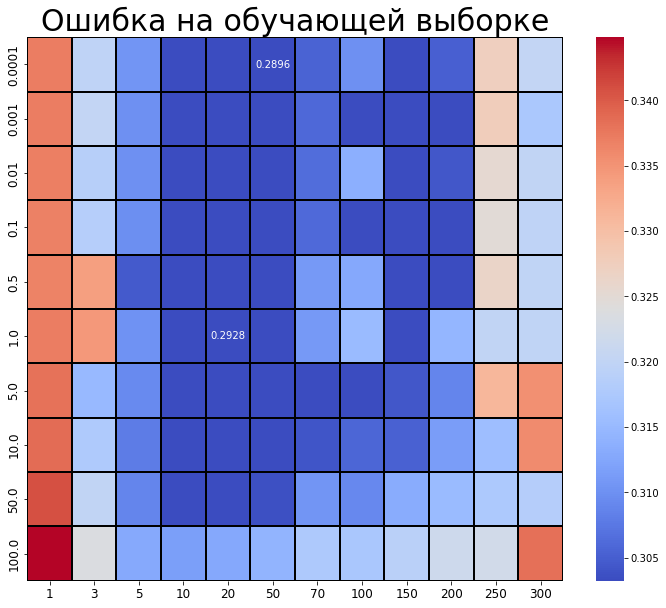

In [74]:
plt.figure(figsize=(12, 10))
plt.plot()
sns.heatmap(Train_error_2, annot = round(Train_error_2[Mask], 4).fillna(''),
            cmap = 'coolwarm', fmt='', linewidths=2, linecolor='black',
            vmin = Train_error_2.quantile(0.9).min())
plt.title('Ошибка на обучающей выборке', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

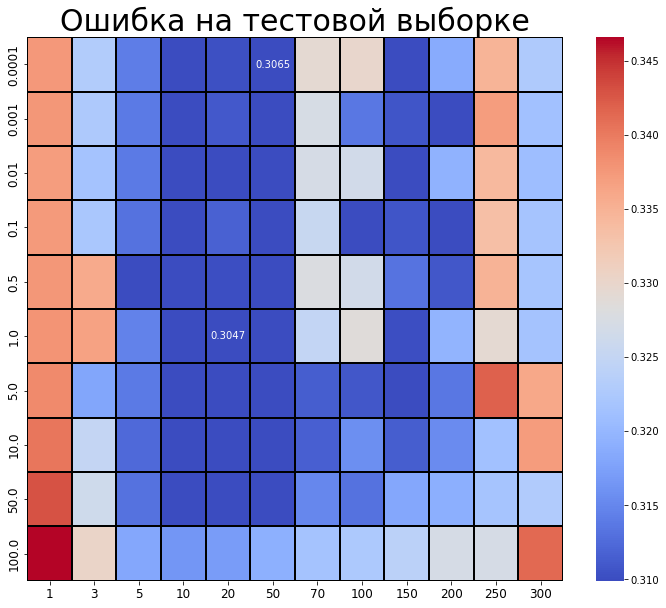

In [75]:
plt.figure(figsize=(12, 10))
plt.plot()
sns.heatmap(Test_error_2, annot = round(Test_error_2[Mask], 4).fillna(''),
            cmap = 'coolwarm', fmt='', linewidths=2, linecolor='black',
            vmin = Test_error_2.quantile(0.9).min())
plt.title('Ошибка на тестовой выборке', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Попробуем построить график ошибок на выборках от параметра alpha при оптимальном количестве нейронов на слое (т.е. при таких N, которые соответсвуют ячейкам минимума не тепловых картах выше).

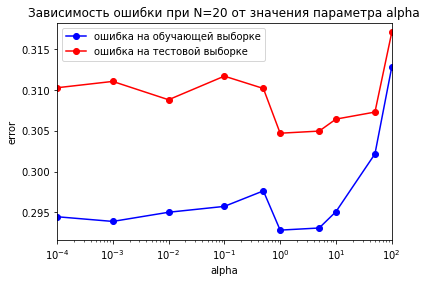

In [77]:
# график ломаной 
plt.semilogx(alphaArr_2, Train_error_2[20], 'b-o', label = 'ошибка на обучающей выборке')
plt.semilogx(alphaArr_2, Test_error_2[20], 'r-o', label = 'ошибка на тестовой выборке')
plt.xlim([np.min(alphaArr_2), np.max(alphaArr_2)])
plt.title('Зависимость ошибки при N=20 от значения параметра alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

Можем наблюдать, что график подтверждает данные тепловой карты при **N = 20** минимум ошибки достиигается при **alpha = 1**.

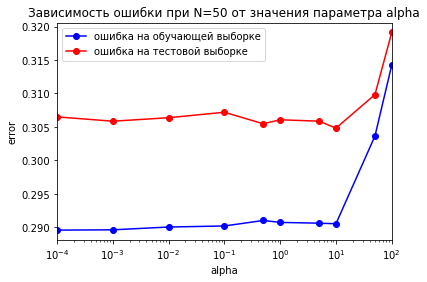

In [78]:
# график ломаной 
plt.semilogx(alphaArr_2, Train_error_2[50], 'b-o', label = 'ошибка на обучающей выборке')
plt.semilogx(alphaArr_2, Test_error_2[50], 'r-o', label = 'ошибка на тестовой выборке')
plt.xlim([np.min(alphaArr_2), np.max(alphaArr_2)])
plt.title('Зависимость ошибки при N=50 от значения параметра alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

При **N = 50** наблюдаем, что минимум достигается около нуля, при **alpha = 0.0001**.

Теперь посмотрим, как менялась метрика (точность) в зависисмости от гиперпараметра.

Построим, для начала, в виде тепловой карты. В данном случае, результат лучше, когда цвет теплее, т.к. это указывает на большее значение, что в случае точностинам и нужно.

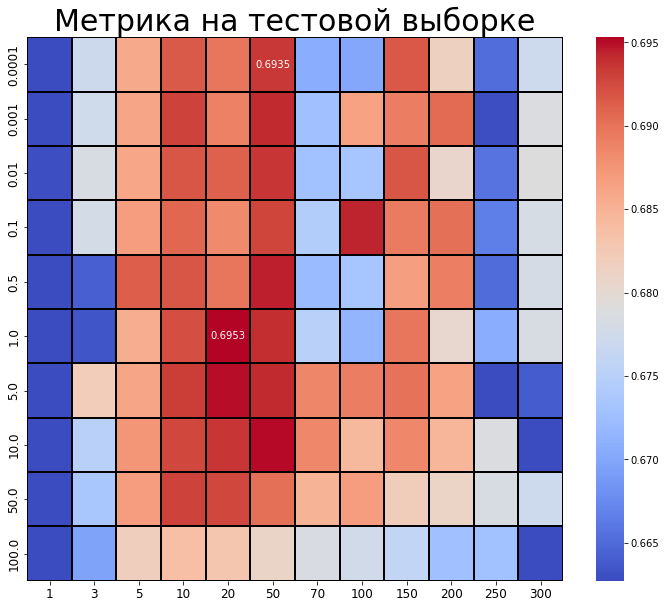

In [79]:
plt.figure(figsize=(12, 10))
plt.plot()
sns.heatmap(Test_accuracy_2, annot = round(Test_accuracy_2[Mask], 4).fillna(''),
            cmap = 'coolwarm', fmt='', linewidths=2, linecolor='black',
            vmin = Test_accuracy_2.quantile(0.9).min())
plt.title('Метрика на тестовой выборке', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

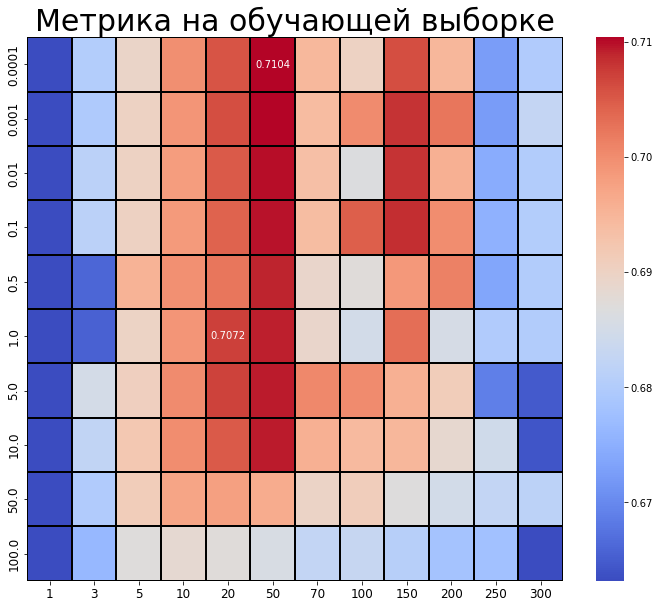

In [81]:
plt.figure(figsize=(12, 10))
plt.plot()
sns.heatmap(Train_accuracy_2, annot = round(Train_accuracy_2[Mask], 4).fillna(''),
            cmap = 'coolwarm', fmt='', linewidths=2, linecolor='black',
            vmin = Train_accuracy_2.quantile(0.9).min())
plt.title('Метрика на обучающей выборке', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show

Так же как и в случае ошибок попробуем построить график уже метрик на выборках от параметра alpha при оптимальном количестве нейронов на слое (т.е. при таких N, которые соответсвуют ячейкам максимума не тепловых картах выше).

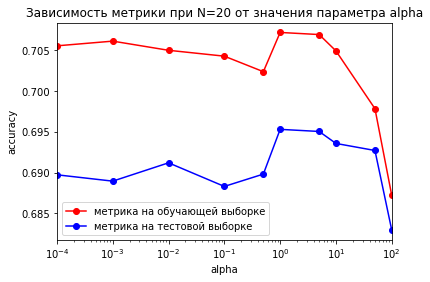

In [82]:
plt.semilogx(alphaArr_2, Train_accuracy_2[20], 'r-o', label = 'метрика на обучающей выборке')
plt.semilogx(alphaArr_2, Test_accuracy_2[20], 'b-o', label = 'метрика на тестовой выборке')
plt.xlim([np.min(alphaArr_2), np.max(alphaArr_2)])
plt.title('Зависимость метрики при N=20 от значения параметра alpha')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()

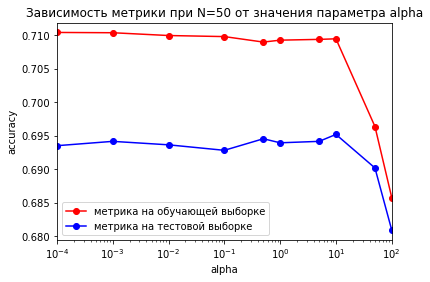

In [84]:
plt.semilogx(alphaArr_2, Train_accuracy_2[50], 'r-o', label = 'метрика на обучающей выборке')
plt.semilogx(alphaArr_2, Test_accuracy_2[50], 'b-o', label = 'метрика на тестовой выборке')
plt.xlim([np.min(alphaArr_2), np.max(alphaArr_2)])
plt.title('Зависимость метрики при N=50 от значения параметра alpha')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()

Так же, как и случае ошибок на выборках, результаты графков по точности подтверждают (или иллюстрируют) показания тепловых карт.

Учитывая, все приведенные графики, можем сделать вывод: что из набора значений гиперпараметра alpha = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100], оптимальными оказались значения **alpha = 0.0001** и **alpha = 1.0**.
Оптимальным количеством нейронов на единственном скрытом слое оказались значения: **N = 50** и **N = 20**.

Поэтому, можем сделать выводы, что наиболее лучшимии вариантами получились пары параметров:

* **alpha** = 1.0, **N** = 20

* **alpha** = 0.0001, **N** = 50

Переобучим две модели при таких параметрах и проанализируем результаты:

##### 13.2.1) **alpha** = 1.0, **N** = 20

In [85]:
mlp_model = MLPClassifier(hidden_layer_sizes = (20,2),
                            solver = 'lbfgs', 
                            activation = 'logistic',
                            random_state = 42,
                            alpha = 1.0)

mlp_model.fit(X_train, y_train)

y_train_predict = mlp_model.predict(X_train)
y_test_predict  = mlp_model.predict(X_test) 

c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [86]:
print(f'Ошибка на обучающей выборке     =  {np.mean(y_train != y_train_predict)}')
print(f'Ошибка на тестовой выборке      =  {np.mean(y_test != y_test_predict)}')
print(f'Метрика на обучающей выборке =  {accuracy_score(y_train, y_train_predict)}')
print(f'Метрика на тестовой выборке   =  {accuracy_score(y_test, y_test_predict)}')

Ошибка на обучающей выборке     =  0.2928233245549655
Ошибка на тестовой выборке      =  0.30469694353306853
Метрика на обучающей выборке =  0.7071766754450345
Метрика на тестовой выборке   =  0.6953030564669315


Выводы:

Из выше выведенных результатов ошибки и точности на выборках видим, что алгоритм справляется примерно одинаково и на тестовой и на обучающей выборке, что свидетельствует об отсутствии недообучения или переобучения.

##### 13.2.2) **alpha** = 0.0001, **N** = 50

In [87]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50,2),
                            solver = 'lbfgs', 
                            activation = 'logistic',
                            random_state = 42,
                            alpha = 0.0001)

mlp_model.fit(X_train, y_train)

y_train_predict = mlp_model.predict(X_train)
y_test_predict  = mlp_model.predict(X_test) 

c:\Prog_J_N\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [88]:
print(f'Ошибка на обучающей выборке     =  {np.mean(y_train != y_train_predict)}')
print(f'Ошибка на тестовой выборке      =  {np.mean(y_test != y_test_predict)}')
print(f'Метрика на обучающей выборке  =  {accuracy_score(y_train, y_train_predict)}')
print(f'Метрика на тестовой выборке   =  {accuracy_score(y_test, y_test_predict)}')

Ошибка на обучающей выборке     =  0.2895997927729569
Ошибка на тестовой выборке      =  0.30651010188223105
Метрика на обучающей выборке  =  0.7104002072270431
Метрика на тестовой выборке   =  0.693489898117769


Выводы:

Из выше выведенных результатов ошибки и точности на выборках видим, что разница между ошибками на выборках стала чуть больше, чем в предыдущей модели, но всё еще остается достатьчно незначительной, что свидетельствует об отсутствии недообучения или переобучения.

### 14) Выводы:

В результате работы над пунктом 13 было проведено обучение модели полносвязной (неглубокой) нейронной сети с одним и двумя скрытыми слоями соответственно. Были использованы целые наборы значений и для гиперпарметра **alpha**, и для **N** - количества нейронов на каждом скрытом слое. Это позволило определить наилучшие варианты среди достаточного количесва примеров.

Были определены наилучшие, среди представленных наборов, варианты сочетаний:

* Для 1 скрытого слоя:

    | Пара значений | Ошибка на тестовой выборке | Точность на тестовой выборке |
    | :----------------: | :--------------------------: | :------------------------: |
    | alpha = 0.5, N = 20 | 0.3155327231911587 | 0.6844672768088413  |
    | alpha = 0.5, N = 50 | 0.31669832498704886 | 0.6833016750129511 |

* Для 2 скрытых слоев:

    | Пара значений | Ошибка на тестовой выборке | Точность на тестовой выборке |
    | :----------------: | :--------------------------: | :------------------------: |
    | alpha = 1.0, N = 20 | 0.30469694353306853 | 0.6953030564669315  |
    | alpha = 0.0001, N = 50 | 0.30651010188223105 | 0.693489898117769 |

Все четыре модели показывают довольно хорошие результаты, близкие друг к другу. 
Однако, всё же можем сделать вывод, что лучше применять 2 скрытых слоя и использовать пару значений
**alpha = 1.0**, **N = 20**. Так ошибка на тестовой выборке минимальна среди всех возможных вариантов: : **0.3047** (т.е. 30,47%), а точность, соответственно, максимальна: 0.6953 (т.е. 69,53%).

Относительно метода KNN, где наилучшим результатот был метод 6 соседей со значениями:
( Ошибка на обучающей выборке: 0.2183 (т.е. 21,83%), ошибка на тестовой выборке: **0.3079** (т.е. 30,79%) ), 
нейронные сети показали немного лучший результат.